### EXPLORATORY DATA ANALYSIS ON AMEO DATASET

### DESCRIPTION 
The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.

### OBJECTIVE
The primary objective of conducting Exploratory Data Analysis (EDA) on the Aspiring Mind Employment Outcome 2015 (AMEO) dataset is to gain comprehensive insights into the employment outcomes of engineering graduates. The analysis aims to explore patterns, relationships, and trends within the dataset, shedding light on the various factors influencing salary, job titles, job locations, and the performance of candidates in the AMCAT exam(Aspiring Minds Computer Adaptive Test).

In [136]:
import numpy as np
import pandas as pd 
from scipy.stats import pearsonr  
from sklearn.linear_model import LinearRegression
df=pd.read_csv(r'C:\Users\deshp\OneDrive\Desktop\internship tasks\EDA project\data.xlsx - Sheet1.csv')

In [137]:
df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000.0,10/1/11 0:00,10/1/12 0:00,software engineer,New Delhi,m,4/15/87 0:00,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000.0,7/1/13 0:00,7/1/13 0:00,technical writer,Hyderabad,f,8/27/92 0:00,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000.0,7/1/13 0:00,present,associate software engineer,Bangalore,m,7/3/91 0:00,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000.0,7/1/14 0:00,1/1/15 0:00,software developer,Asifabadbanglore,f,3/20/92 0:00,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [3]:
df.drop(columns=['Unnamed: 0','ID','CollegeID','CollegeCityID'],inplace=True)

In [4]:
df.tail()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3993,280000.0,10/1/11 0:00,10/1/12 0:00,software engineer,New Delhi,m,4/15/87 0:00,52.09,cbse,2006,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,100000.0,7/1/13 0:00,7/1/13 0:00,technical writer,Hyderabad,f,8/27/92 0:00,90.00,state board,2009,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,320000.0,7/1/13 0:00,present,associate software engineer,Bangalore,m,7/3/91 0:00,81.86,"bse,odisha",2008,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,200000.0,7/1/14 0:00,1/1/15 0:00,software developer,Asifabadbanglore,f,3/20/92 0:00,78.72,state board,2010,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943
3997,400000.0,2/1/13 0:00,present,senior systems engineer,Chennai,f,2/26/91 0:00,70.60,cbse,2008,...,-1,-1,-1,-1,-1,-1.1128,-0.2793,-0.6343,1.32553,-0.6035


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3998 non-null   float64
 1   DOJ                    3998 non-null   object 
 2   DOL                    3998 non-null   object 
 3   Designation            3998 non-null   object 
 4   JobCity                3998 non-null   object 
 5   Gender                 3998 non-null   object 
 6   DOB                    3998 non-null   object 
 7   10percentage           3998 non-null   float64
 8   10board                3998 non-null   object 
 9   12graduation           3998 non-null   int64  
 10  12percentage           3998 non-null   float64
 11  12board                3998 non-null   object 
 12  CollegeTier            3998 non-null   int64  
 13  Degree                 3998 non-null   object 
 14  Specialization         3998 non-null   object 
 15  coll

In [6]:
df['JobCity']=df['JobCity'].str.strip()

In [7]:

df['JobCity']=df['JobCity'].str.replace('-1','np.nan')
df['JobCity']

0              Bangalore
1                 Indore
2                Chennai
3                Gurgaon
4                Manesar
              ...       
3993           New Delhi
3994           Hyderabad
3995           Bangalore
3996    Asifabadbanglore
3997             Chennai
Name: JobCity, Length: 3998, dtype: object

In [8]:
df['JobCity'].head()

0    Bangalore
1       Indore
2      Chennai
3      Gurgaon
4      Manesar
Name: JobCity, dtype: object

In [9]:
df['DOB']=pd.to_datetime(df['DOB'])


In [10]:
df['DOB']

0      1990-02-19
1      1989-10-04
2      1992-08-03
3      1989-12-05
4      1991-02-27
          ...    
3993   1987-04-15
3994   1992-08-27
3995   1991-07-03
3996   1992-03-20
3997   1991-02-26
Name: DOB, Length: 3998, dtype: datetime64[ns]

In [11]:
df['CollegeTier']

0       2
1       2
2       2
3       1
4       2
       ..
3993    2
3994    2
3995    2
3996    2
3997    2
Name: CollegeTier, Length: 3998, dtype: int64

In [12]:
df['DOJ']=pd.to_datetime(df['DOJ'])
df['DOJ']

0      2012-06-01
1      2013-09-01
2      2014-06-01
3      2011-07-01
4      2014-03-01
          ...    
3993   2011-10-01
3994   2013-07-01
3995   2013-07-01
3996   2014-07-01
3997   2013-02-01
Name: DOJ, Length: 3998, dtype: datetime64[ns]

In [13]:
df['DOL'].unique()

array(['present', '3/1/15 0:00', '5/1/15 0:00', '7/1/15 0:00',
       '4/1/15 0:00', '10/1/14 0:00', '9/1/14 0:00', '6/1/14 0:00',
       '9/1/12 0:00', '12/1/13 0:00', '6/1/15 0:00', '10/1/13 0:00',
       '1/1/15 0:00', '4/1/14 0:00', '6/1/13 0:00', '3/1/12 0:00',
       '7/1/14 0:00', '2/1/13 0:00', '1/1/14 0:00', '4/1/13 0:00',
       '7/1/12 0:00', '5/1/14 0:00', '9/1/13 0:00', '2/1/15 0:00',
       '1/1/12 0:00', '8/1/15 0:00', '8/1/14 0:00', '12/1/15 0:00',
       '12/1/14 0:00', '5/1/12 0:00', '3/1/11 0:00', '7/1/11 0:00',
       '2/1/14 0:00', '12/1/11 0:00', '10/1/15 0:00', '11/1/14 0:00',
       '3/1/14 0:00', '11/1/11 0:00', '5/1/13 0:00', '7/1/13 0:00',
       '11/1/13 0:00', '1/1/11 0:00', '5/1/11 0:00', '2/1/12 0:00',
       '11/1/12 0:00', '6/1/12 0:00', '8/1/13 0:00', '3/1/05 0:00',
       '3/1/13 0:00', '10/1/12 0:00', '2/1/11 0:00', '2/1/10 0:00',
       '1/1/13 0:00', '6/1/11 0:00', '9/1/15 0:00', '4/1/12 0:00',
       '8/1/12 0:00', '4/1/11 0:00', '10/1/11 0:00', '

In [14]:
df['DOL']=df['DOL'].replace('0:00','')

In [15]:
df['DOL']=df['DOL'].replace('present',np.NAN)
df['DOL'].unique()

array([nan, '3/1/15 0:00', '5/1/15 0:00', '7/1/15 0:00', '4/1/15 0:00',
       '10/1/14 0:00', '9/1/14 0:00', '6/1/14 0:00', '9/1/12 0:00',
       '12/1/13 0:00', '6/1/15 0:00', '10/1/13 0:00', '1/1/15 0:00',
       '4/1/14 0:00', '6/1/13 0:00', '3/1/12 0:00', '7/1/14 0:00',
       '2/1/13 0:00', '1/1/14 0:00', '4/1/13 0:00', '7/1/12 0:00',
       '5/1/14 0:00', '9/1/13 0:00', '2/1/15 0:00', '1/1/12 0:00',
       '8/1/15 0:00', '8/1/14 0:00', '12/1/15 0:00', '12/1/14 0:00',
       '5/1/12 0:00', '3/1/11 0:00', '7/1/11 0:00', '2/1/14 0:00',
       '12/1/11 0:00', '10/1/15 0:00', '11/1/14 0:00', '3/1/14 0:00',
       '11/1/11 0:00', '5/1/13 0:00', '7/1/13 0:00', '11/1/13 0:00',
       '1/1/11 0:00', '5/1/11 0:00', '2/1/12 0:00', '11/1/12 0:00',
       '6/1/12 0:00', '8/1/13 0:00', '3/1/05 0:00', '3/1/13 0:00',
       '10/1/12 0:00', '2/1/11 0:00', '2/1/10 0:00', '1/1/13 0:00',
       '6/1/11 0:00', '9/1/15 0:00', '4/1/12 0:00', '8/1/12 0:00',
       '4/1/11 0:00', '10/1/11 0:00', '11/1/1

In [16]:
df['DOL'] = df['DOL'].fillna(pd.to_datetime('today'))

In [17]:
df['DOL']

0       2024-02-23 11:45:23.036516
1       2024-02-23 11:45:23.036516
2       2024-02-23 11:45:23.036516
3       2024-02-23 11:45:23.036516
4                      3/1/15 0:00
                   ...            
3993                  10/1/12 0:00
3994                   7/1/13 0:00
3995    2024-02-23 11:45:23.036516
3996                   1/1/15 0:00
3997    2024-02-23 11:45:23.036516
Name: DOL, Length: 3998, dtype: object

In [18]:
 df['DOL']= pd.to_datetime(df['DOL']) 

In [19]:
df.describe()

,Salary,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,3.076998e+05,77.925443,2008.087544,74.466366,1.925713,71.486171,0.300400,2012.105803,501.649075,501.598799,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,2.127375e+05,9.850162,1.653599,10.999933,0.262270,8.167338,0.458489,31.857271,104.940021,86.783297,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,3.500000e+04,43.000000,1995.000000,40.000000,1.000000,6.450000,0.000000,0.000000,180.000000,195.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,1.800000e+05,71.680000,2007.000000,66.000000,2.000000,66.407500,0.000000,2012.000000,425.000000,445.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,3.000000e+05,79.150000,2008.000000,74.400000,2.000000,71.720000,0.000000,2013.000000,500.000000,505.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,3.700000e+05,85.670000,2009.000000,82.600000,2.000000,76.327500,1.000000,2014.000000,570.000000,565.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,4.000000e+06,97.760000,2013.000000,98.700000,2.000000,99.930000,1.000000,2017.000000,875.000000,795.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [20]:
df.shape

(3998, 35)

In [21]:
df['Salary']=df['Salary'].astype(int)
df['Salary']

0        420000
1        500000
2        325000
3       1100000
4        200000
         ...   
3993     280000
3994     100000
3995     320000
3996     200000
3997     400000
Name: Salary, Length: 3998, dtype: int32

In [22]:
df['Designation'].str.strip()

0           senior quality engineer
1                 assistant manager
2                  systems engineer
3          senior software engineer
4                               get
                   ...             
3993              software engineer
3994               technical writer
3995    associate software engineer
3996             software developer
3997        senior systems engineer
Name: Designation, Length: 3998, dtype: object

In [23]:
df['Designation']=df['Designation'].str.replace('systems engineer','system engineer')
df['Designation']

0           senior quality engineer
1                 assistant manager
2                   system engineer
3          senior software engineer
4                               get
                   ...             
3993              software engineer
3994               technical writer
3995    associate software engineer
3996             software developer
3997         senior system engineer
Name: Designation, Length: 3998, dtype: object

In [24]:
df['Designation'] = df['Designation'].str.lower()
similar_words = ['software engineere','software engineer associate','software analyst','software engg']

for word in similar_words:
    df['Designation'] = df['Designation'].replace(word, 'Software Enginner', regex=True)


df['Designation'] = df['Designation'].str.lower()
similar_words = ['recruiter','hr recruiter','corporate recruiter','executive recruiter','technical recruiter','executive hr','it recruiter','talent acquisition specialist','junior recruiter','human resources associate','hr assistant','human resource assistant']


for word in similar_words:
    df['Designation'] = df['Designation'].replace(word, 'Recruiter', regex=True)


df['Designation'] = df['Designation'].str.lower()
similar_words = ['recruitment coordinator','hr generalist','hr manager']

for word in similar_words:
    df['Designation'] = df['Designation'].replace(word, 'HR', regex=True)

In [25]:
df['JobCity'] = df['JobCity'].replace('-1',np.nan)


df['JobCity'] = df['JobCity'].str.lower()
similar_words = ['bangalore', 'banglore', 'bengaluru', 'banagalore', 'bengaluru', 'bangalore', 'banglore', 'BANGALORE', 'bengaluru', 'BAngalore', 'BANGLORE', 'banglore','banaglore']

for word in similar_words:
    df['JobCity'] = df['JobCity'].replace(word, 'Bengaluru', regex=True)

similar_words = ['Hyderabad','HYDERABAD','Hyderabad','hyderabad','hyderabad(bhadurpally)','Hyderabad(bhadurpally)','Hyderabad(bhadurpally)','Hyderabad','hderabad','Hyderabad','Hyderabad(bhadurpally)']

for word in similar_words:
  df['JobCity']= df['JobCity'].replace(word,"Hyderabad",regex=True)

similar_words = ['Delhi', 'delhi', 'New Delhi', 'new delhi - jaisalmer', 'New delhi', 'DELHI', 'Delhi/NCR', 'NEW DELHI', 'new dehli']

for word in similar_words:
  df['JobCity']= df['JobCity'].replace(word,"Delhi",regex=True)

similar_words = ['Navi Mumbai', 'Mumbai', 'mumbai', 'MUMBAI', 'NAVI MUMBAI', 'Navi mumbai']

for word in similar_words:
  df['JobCity']= df['JobCity'].replace(word,"Mumbai",regex=True)

similar_words = ['Mysore','mysore']

for word in similar_words:
  df['JobCity']= df['JobCity'].replace(word,"Mysore",regex=True)

imilar_words = ['Bhubaneswar', 'Bhubaneshwar', 'bhubaneswar', 'Bhubneshwar']

for word in similar_words:
  df['JobCity']= df['JobCity'].replace(word,"Bhubaneswar",regex=True)


similar_words =['Kolkata', 'kolkata', 'Kolkata`', 'KOLKATA']

for word in similar_words:
  df['JobCity']= df['JobCity'].replace(word,"Kolkata",regex=True)

In [26]:
df['10percentage']=df['10percentage' ].round().astype(int)

In [27]:
df['collegeGPA']=df['collegeGPA'].round().astype(int)

In [28]:
 df['Domain'] = df['Domain'].replace('-1',0)
 df['ComputerProgramming'] = df['ComputerProgramming'].replace('-1',0)
 df['ElectronicsAndSemicon'] = df['ElectronicsAndSemicon'].replace('-1',0)
 df['ComputerScience'] = df['ComputerScience'].replace('-1',0)
 df['MechanicalEngg'] = df['MechanicalEngg'].replace('-1',0)
 df['ElectricalEngg'] = df['ElectricalEngg'].replace('-1',0)
 df['TelecomEngg'] = df['TelecomEngg'].replace('-1',0)
 df['CivilEngg'] = df['CivilEngg'].replace('-1',0)

In [29]:
board_variations = [
    'board ofsecondary education,ap',
    'state board of secondary education, andhra pradesh',
    'board secondary education',
    'board of secondary education',
    'board of secondary education,andhara pradesh',
    'board of secondary education',
    'ssc board of andrapradesh',
    'ssc-andhra pradesh',
    'secondary school of education',
    'andhra pradesh board ssc',
    'board of secondary education, andhra pradesh',
    'board of secondary education,ap',
    'board of secondary education,andhra pradesh',
    'school secondary education, andhra pradesh',
    'secondary state certificate',
    'andhra pradesh state board',
    'secondary school certificate',
    'state board',
    'state board of secondary education, ap',
    'board of secondaray education',
    'secondary school education',
    'board of secondary education - andhra pradesh',
    'ap state board for secondary education',
    'board of ssc education andhra pradesh',
    'ssc',
    'state',
    'board of ssc',
    'state board',
    'state board of secondary education( ssc)',
    'board secondary  education',
    'board of  secondary education'
]

# Iterate through the rows and replace values
for index, i in df.iterrows():
    for variation in board_variations:
        if variation in i['10board']:
            df.at[index, '10board'] = 'state board of secondary education, AP'
            break

In [30]:
df['10board']

0       state board of secondary education, AP
1                                         cbse
2                                         cbse
3                                         cbse
4                                         cbse
                         ...                  
3993                                      cbse
3994    state board of secondary education, AP
3995                                bse,odisha
3996    state board of secondary education, AP
3997                                      cbse
Name: 10board, Length: 3998, dtype: object

In [31]:
df['12board'] = df['12board'].str.strip()

In [32]:
df['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', '0', 'bseb', 'chse', 'puc',
       'upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state board',

In [33]:
board_variations = [
    'board of intermediate education,ap',
    'state board',
    'state board of intermediate education, andhra pradesh',
    'board of intermediate',
    'hisher seconadry examination(state board)',
    'borad of intermediate',
    'intermediate board of andhra pardesh',
    'state',
    'intermediate state board',
    'stateboard',
    'andhra board',
    'baord of intermediate education',
    'intermediate',
    'staae board',
    'all india board',
    'board of secondary education',
    'board of intermediate education,andhra pradesh',
    'intermediate board of education,andhra pradesh',
    'intermediate board examination',
    'board of secondary education',
    'board of intermediate education,andra pradesh',
    'intermediate board',
    'board of secondary school of education',
    'board of intermediate ap',
    'andhpradesh board of intermediate education',
    'board of intermediate education, andhra pradesh',
    'board of intermediate education:ap,hyderabad',
    'intermidiate',
    'board of intermidiate',
    'andhra pradesh state board',
    'board of intermediate(bie)',
    'board of intermidiate examination',
    'ap board',
    'andhra pradesh board of secondary education',
    'intermideate',
    'board of intermeadiate education, andhra pradesh',
    'board of intrmediate education,ap,higher secondary education',
    'intermedite',
    'board of intmediate education ap',
    'board of intrmediate education,ap'
]


for index, row in df.iterrows():
    for variation in board_variations:
        if variation in row['12board']:
            df.at[index, '12board'] = 'state board of Intermediate education, AP'
            break

In [34]:
df['12percentage']=df['12percentage'].round().astype(int)
df['12percentage']

0       96
1       85
2       68
3       84
4       77
        ..
3993    56
3994    93
3995    66
3996    70
3997    68
Name: 12percentage, Length: 3998, dtype: int32

### Univariate and Bivariate Non visualiztion analysis

In [53]:
 import pandas as pd
df
total_cols = len(df.columns)
half_cols = total_cols // 2
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object','category']).columns
 #Separate numerical and categorical columns based on their data types
numerical_half = numerical_cols[:half_cols]
categorical_half = categorical_cols[:half_cols]


print("Numerical Columns:")
print(numerical_half)
print("\nCategorical Columns:")
print(categorical_half)


Numerical Columns:
Index(['Salary', '10percentage', '12graduation', '12percentage', 'CollegeTier',
       'collegeGPA', 'CollegeCityTier', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg'],
      dtype='object')

Categorical Columns:
Index(['Designation', 'JobCity', 'Gender', '10board', '12board', 'Degree',
       'Specialization', 'CollegeState'],
      dtype='object')


In [55]:
import pandas as pd

total_cols = len(df.columns)
numerical_cols = df.select_dtypes(include=['number']).columns


print("Numerical Columns:")
print(numerical_cols)


Numerical Columns:
Index(['Salary', '10percentage', '12graduation', '12percentage', 'CollegeTier',
       'collegeGPA', 'CollegeCityTier', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')


In [56]:
df['Designation'].value_counts()

software engineer                    539
system engineer                      323
software developer                   265
programmer analyst                   139
java software engineer               111
                                    ... 
human resources intern                 1
senior quality assurance engineer      1
clerical assistant                     1
delivery software engineer             1
jr. software developer                 1
Name: Designation, Length: 406, dtype: int64

In [57]:
df['JobCity'].value_counts()

Bengaluru            686
np.nan               461
noida                389
Hyderabad            369
pune                 327
                    ... 
tirunelvelli           1
asansol                1
india                  1
bhagalpur              1
asifabadBengaluru      1
Name: JobCity, Length: 225, dtype: int64

In [58]:
df['Designation'].nunique()

406

In [59]:
df['JobCity'].value_counts()

Bengaluru            686
np.nan               461
noida                389
Hyderabad            369
pune                 327
                    ... 
tirunelvelli           1
asansol                1
india                  1
bhagalpur              1
asifabadBengaluru      1
Name: JobCity, Length: 225, dtype: int64

In [60]:
df['Specialization'].nunique()

46

In [61]:
df['12board'].value_counts()

state board of Intermediate education, AP                       1485
cbse                                                            1400
0                                                                359
icse                                                             129
up board                                                          87
                                                                ... 
matric board                                                       1
stjoseph of cluny matrhrsecschool,neyveli,cuddalore district       1
scte and vt ,orissa                                                1
hbsc                                                               1
up-board                                                           1
Name: 12board, Length: 242, dtype: int64

In [62]:
df['10board'].value_counts()

state board of secondary education, AP                          1445
cbse                                                            1395
0                                                                350
icse                                                             281
up board                                                          85
                                                                ... 
karnataka sslc board bangalore                                     1
u p                                                                1
karnataka secondary board                                          1
stjoseph of cluny matrhrsecschool,neyveli,cuddalore district       1
bse,odisha                                                         1
Name: 10board, Length: 193, dtype: int64

In [65]:
import pandas as pd

def univariate_analysis(df, numerical_cols):
    """
    Perform univariate analysis for numerical columns in a DataFrame.
    
    Parameters:
        df (DataFrame): The pandas DataFrame containing the data.
        numerical_cols (list): List of numerical column names.
    
    Returns:
        DataFrame: Summary statistics for each numerical column.
    """
    analysis_df = pd.DataFrame(columns=['Column', 'Mean', 'Median', 'Std Deviation', 'Min', '25%', '50%', '75%', 'Max'])
    
   
    for col in numerical_cols:
        mean = df[col].mean()
        median = df[col].median()
        std_dev = df[col].std()
        minimum = df[col].min()
        q25 = df[col].quantile(0.25)
        q50 = df[col].quantile(0.50)
        q75 = df[col].quantile(0.75)
        maximum = df[col].max()
        
        # Appending the results to the analysis DataFrame
        analysis_df = analysis_df.append({'Column': col,
                                          'Mean': mean,
                                          'Median': median,
                                          'Std Deviation': std_dev,
                                          'Min': minimum,
                                          '25%': q25,
                                          '50%': q50,
                                          '75%': q75,
                                          'Max': maximum}, ignore_index=True)
    
    return analysis_df


In [64]:
#the univariate_analysis function
univariate_analysis_result = univariate_analysis(df, numerical_cols)
print(univariate_analysis_result)


C:\Users\deshp\AppData\Local\Temp\ipykernel_27424\1605512511.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  analysis_df = analysis_df.append({'Column': col,
C:\Users\deshp\AppData\Local\Temp\ipykernel_27424\1605512511.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  analysis_df = analysis_df.append({'Column': col,
C:\Users\deshp\AppData\Local\Temp\ipykernel_27424\1605512511.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  analysis_df = analysis_df.append({'Column': col,
C:\Users\deshp\AppData\Local\Temp\ipykernel_27424\1605512511.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  analysis_df = analysis_df.append({'Column

                   Column           Mean    Median  Std Deviation     Min  \
0                  Salary  307699.849925  300000.0  212737.499957   35000   
1            10percentage      77.923212      79.0       9.851251      43   
2            12graduation    2008.087544    2008.0       1.653599    1995   
3            12percentage      74.465983      74.0         11.002      40   
4             CollegeTier       1.925713       2.0        0.26227       1   
5              collegeGPA      71.482491      72.0       8.168513       6   
6         CollegeCityTier         0.3004       0.0       0.458489       0   
7          GraduationYear    2012.105803    2013.0      31.857271       0   
8                 English     501.649075     500.0     104.940021     180   
9                 Logical     501.598799     505.0      86.783297     195   
10                  Quant     513.378189     515.0     122.302332     120   
11                 Domain        0.51049  0.622643       0.468671    -1.0   

C:\Users\deshp\AppData\Local\Temp\ipykernel_27424\1605512511.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  analysis_df = analysis_df.append({'Column': col,
C:\Users\deshp\AppData\Local\Temp\ipykernel_27424\1605512511.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  analysis_df = analysis_df.append({'Column': col,
C:\Users\deshp\AppData\Local\Temp\ipykernel_27424\1605512511.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  analysis_df = analysis_df.append({'Column': col,
C:\Users\deshp\AppData\Local\Temp\ipykernel_27424\1605512511.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  analysis_df = analysis_df.append({'Column

In [139]:
maximum = df[col].max()

### Observations:-
Salary Distribution: The mean salary is approximately 307,700 with a significant standard deviation of $212,737. This indicates a wide range of salaries within the dataset, suggesting variations in job roles, industries, and experience levels.

Academic Performance:

The mean 10th and 12th percentage scores are around 78% and 74%, respectively, indicating a relatively consistent academic performance among the candidates.
The mean college GPA is approximately 71.5, which is decent but not exceptionally high.
Educational Background:

Most students graduated from high school around the year 2008.
The majority of candidates are from College Tier 2 institutions.
About 30% of candidates studied in city-tier colleges.

Technical Skills:
The mean scores for English, Logical, and Quantitative abilities are around 500, indicating a moderate level of proficiency in these areas.
Scores in computer programming and other engineering domains vary widely, with negative values indicating missing data or non-participation in those subjects.
Personality Traits:

Candidates, on average, exhibit slightly negative conscientiousness and extraversion traits, with positive scores in agreeableness and openness to experience. Neuroticism scores tend to be negative on average.
The standard deviations for personality traits are relatively high, indicating significant variability among individuals in these aspects.

Conclusion:
The dataset represents a diverse group of individuals with varying academic backgrounds, technical skills, and personality traits.
Salaries vary widely, likely influenced by factors such as education, skills, experience, and industry.
While academic performance is decent on average, there is significant diversity in technical skills and personality traits among candidates.
Further analysis, such as correlation studies between different variables, could provide deeper insights into the factors influencing salary and career success in this dataset.





### Univariate  Visualizing Analysis  for Numeric data


Outliers in {column}: {outliers}


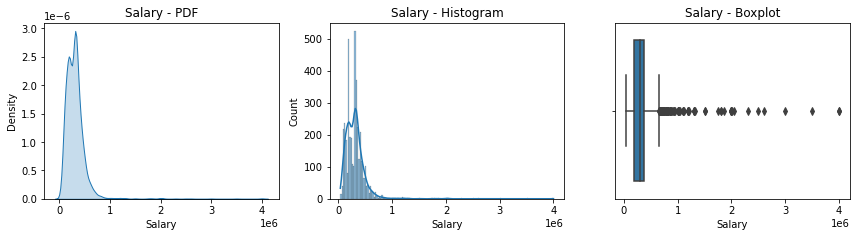

Outliers in {column}: {outliers}


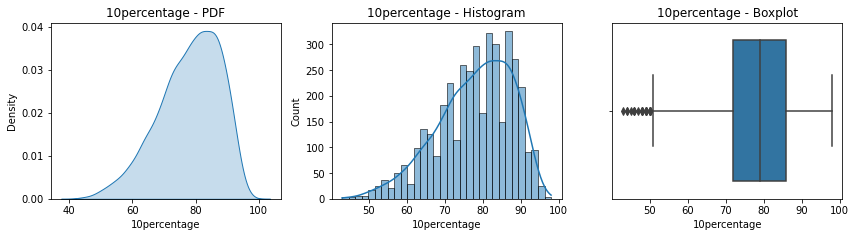

Outliers in {column}: {outliers}


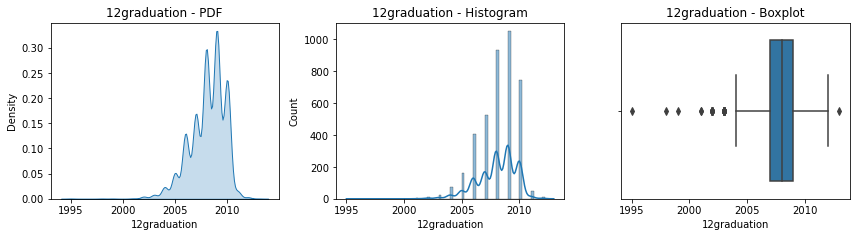

Outliers in {column}: {outliers}


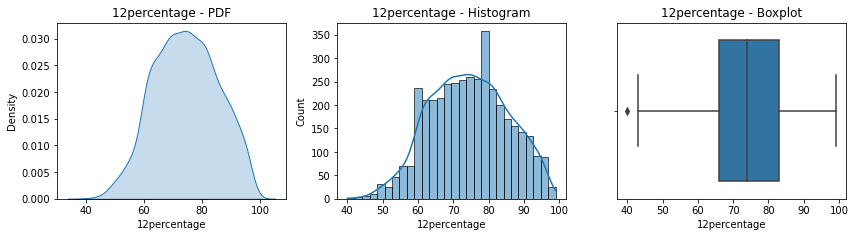

Outliers in {column}: {outliers}


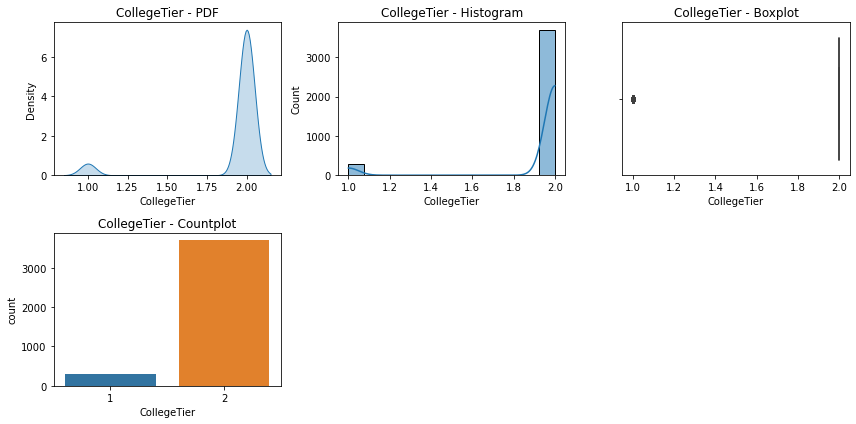

Outliers in {column}: {outliers}


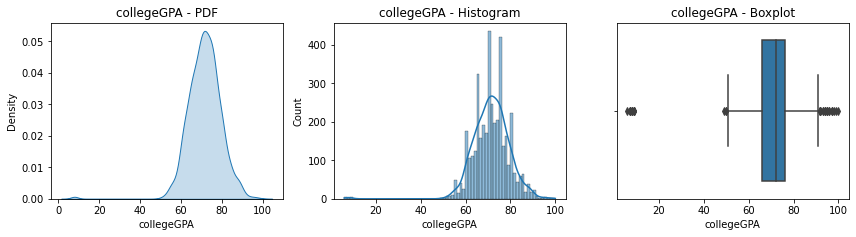

Outliers in {column}: {outliers}


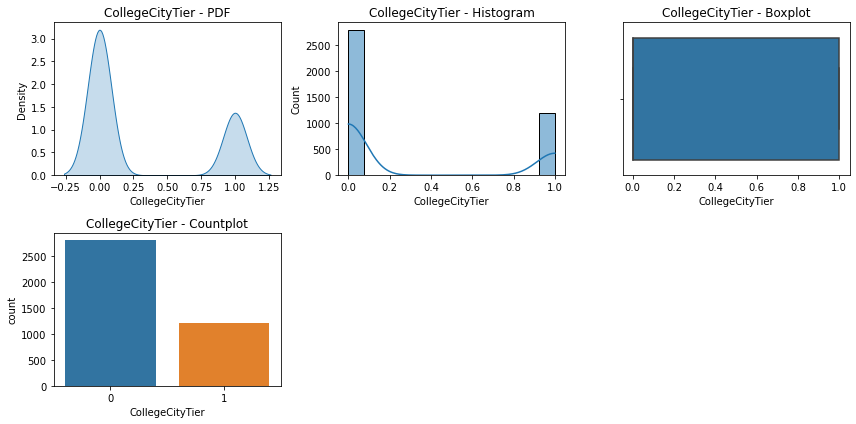

Outliers in {column}: {outliers}


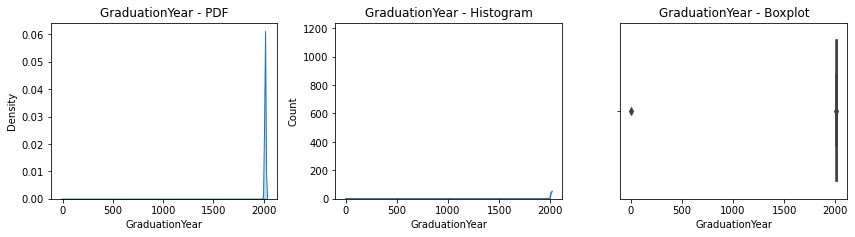

Outliers in {column}: {outliers}


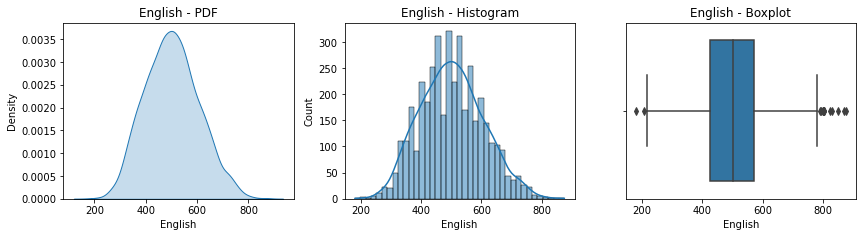

Outliers in {column}: {outliers}


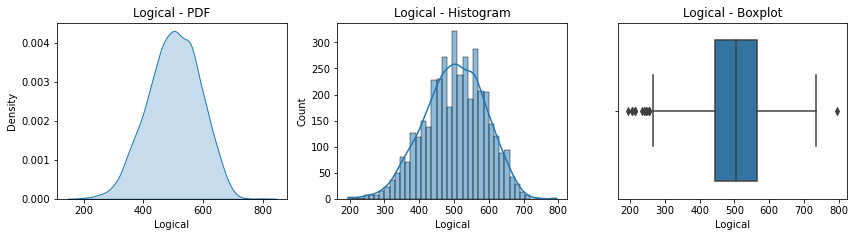

Outliers in {column}: {outliers}


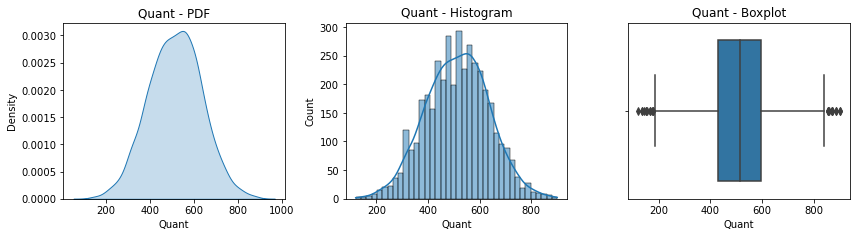

Outliers in {column}: {outliers}


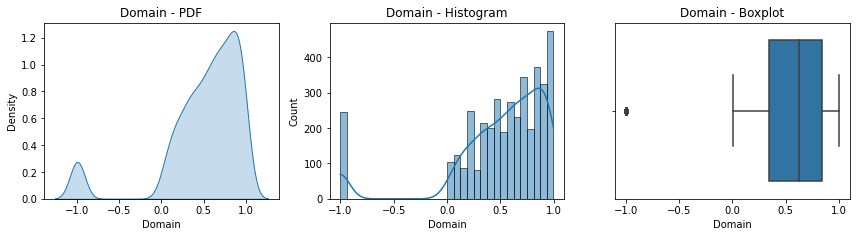

Outliers in {column}: {outliers}


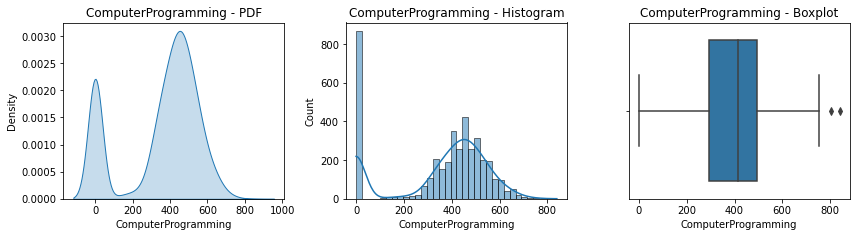

Outliers in {column}: {outliers}


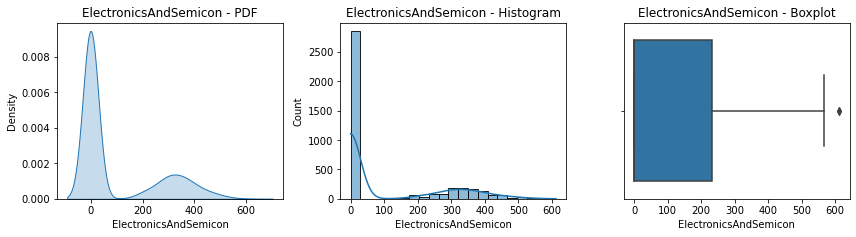

Outliers in {column}: {outliers}


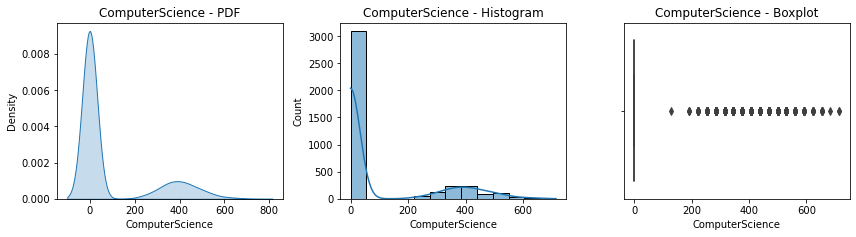

Outliers in {column}: {outliers}


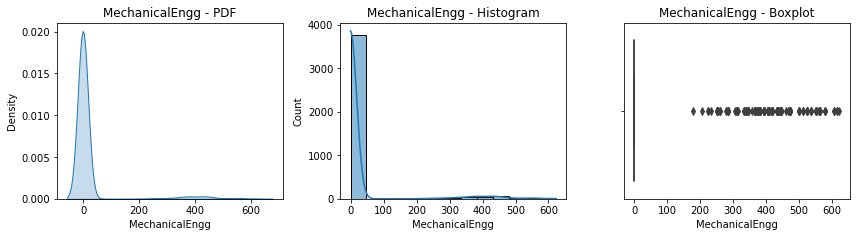

Outliers in {column}: {outliers}


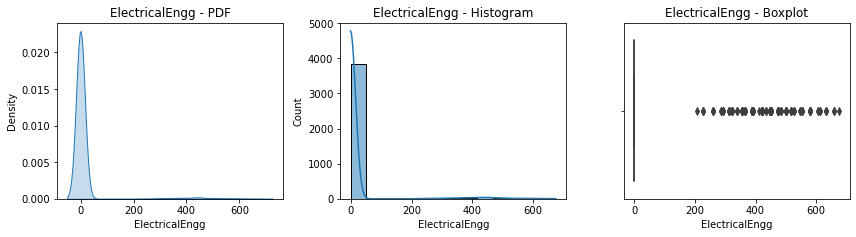

Outliers in {column}: {outliers}


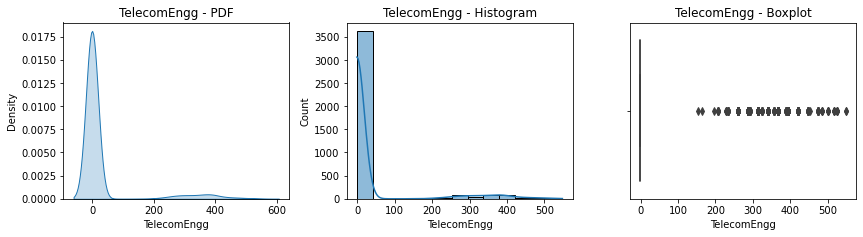

Outliers in {column}: {outliers}


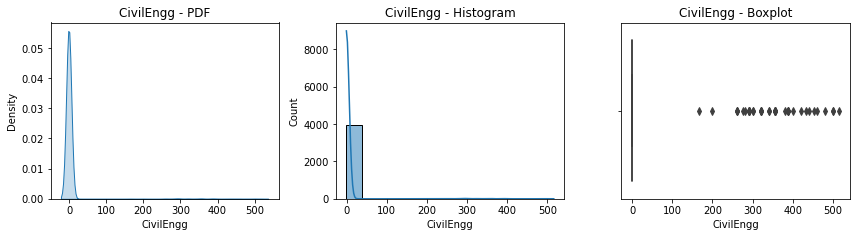

Outliers in {column}: {outliers}


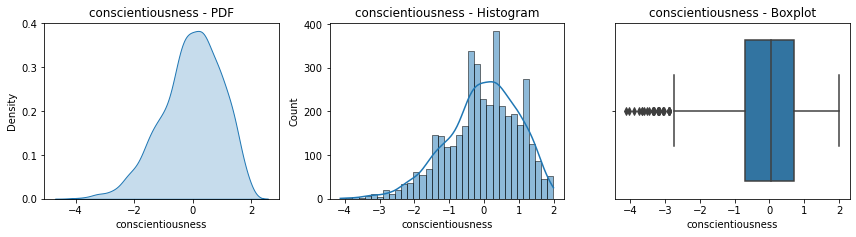

Outliers in {column}: {outliers}


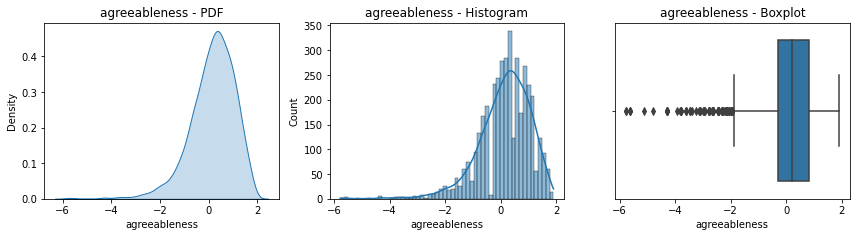

Outliers in {column}: {outliers}


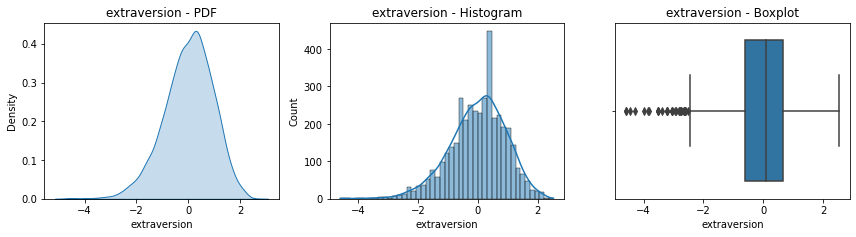

Outliers in {column}: {outliers}


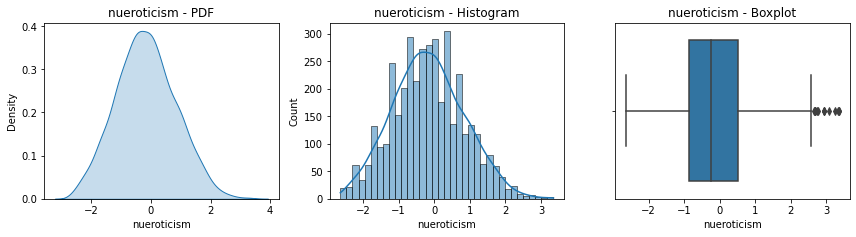

Outliers in {column}: {outliers}


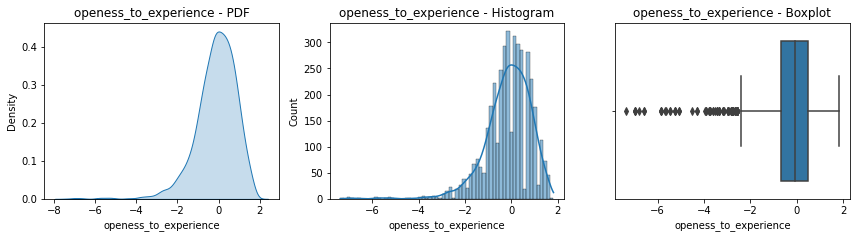

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numerical_columns = ['Salary', '10percentage', '12graduation', '12percentage',
                      'CollegeTier', 'collegeGPA',
                     'CollegeCityTier', 'GraduationYear', 'English', 'Logical',
                     'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
                     'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
                     'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
                     'nueroticism', 'openess_to_experience']
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    
    # PDF
    plt.subplot(2, 3, 1)
    sns.kdeplot(df[column], fill=True)
    plt.title(f'{column} - PDF')
    
    # Histogram
    plt.subplot(2, 3, 2)
    sns.histplot(df[column], kde=True)
    plt.title(f'{column} - Histogram')
    
    # Boxplot
    plt.subplot(2, 3, 3)
    sns.boxplot(x=df[column])
    plt.title(f'{column} - Boxplot')
    
    # Countplot is done if it is approriate
    if len(df[column].unique()) <= 10:
        plt.subplot(2, 3, 4)
        sns.countplot(x=df[column])
        plt.title(f'{column} - Countplot')
    
    # Outlier detection
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print('Outliers in {column}: {outliers}')
    
    plt.tight_layout()
    plt.show()


### OBSERVATIONS:-
1. Salary is right skewed,positive skewness,where there may be a large number of lower earners and fewer extremely high earners, indicates a wide range of salaries within the dataset, suggesting variations in job roles, industries, and experience levels.most of the outliers lie towards the right
2. 10 percentage:-where there may be a small number of extremely high rankers  skewing the distribution to the left and box plot indicates the more number of outliers towards left. 
3. 12 graduate:-Most of the students with 12th graduated  lies between 2005  to 2010,  most of the outliers lies towards   left side.
4. 12 percentage:-Indicating a relatively consistent academic performance among the candidates.
5. college Tier:-The majority of candidates are from College Tier 2 institutions
6. GPA:-it shows very less outliers towards left.
7. Graduation year:-Most of the students graduated in 2000
8. English,Logical,Quant:-Indicating a moderate level of proficiency in these areas.
9. Scores in computer programming and other engineering domains vary widely, with negative values
10. Candidates, on average, exhibit slightly negative conscientiousness and extraversion traits, Neuroticism scores tend to be negative on average    

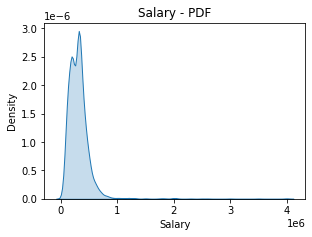

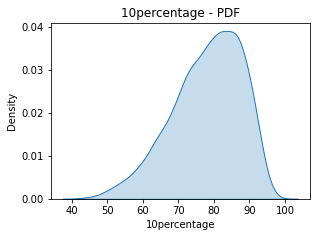

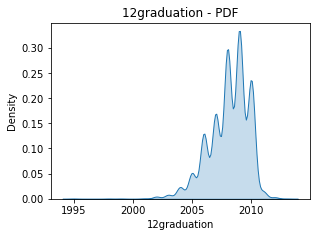

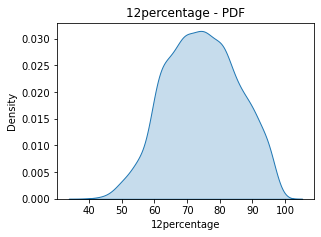

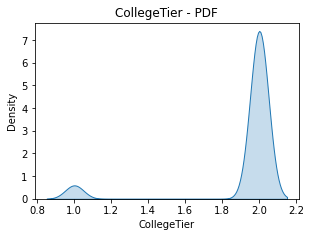

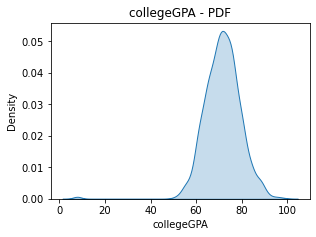

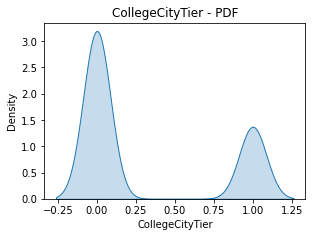

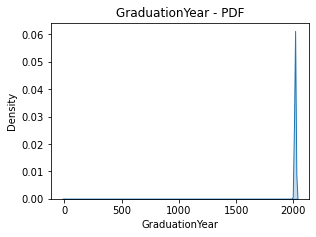

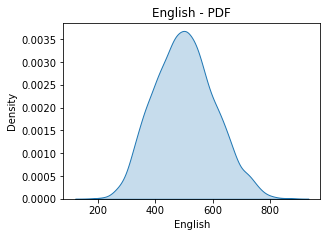

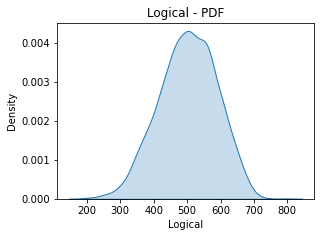

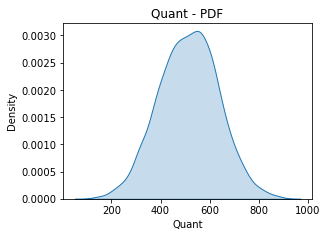

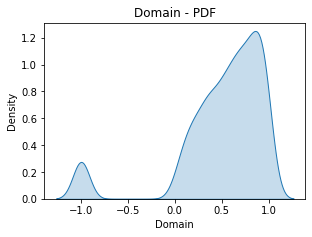

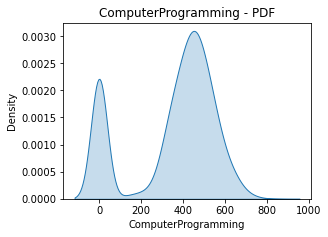

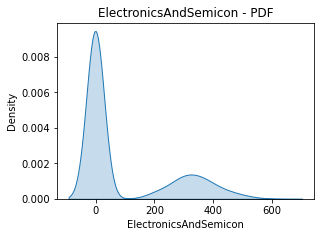

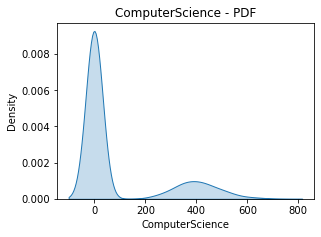

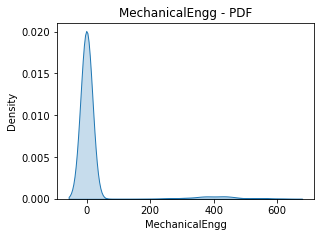

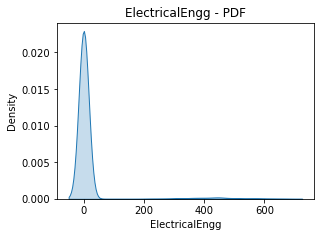

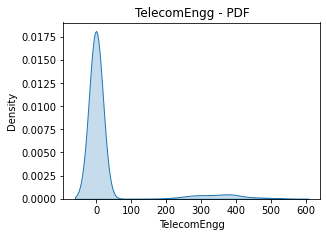

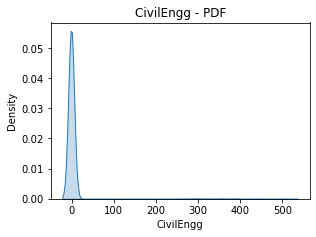

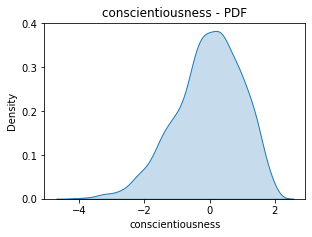

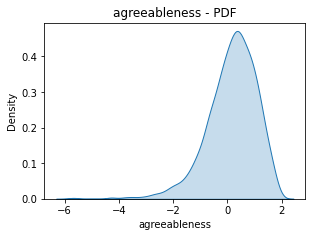

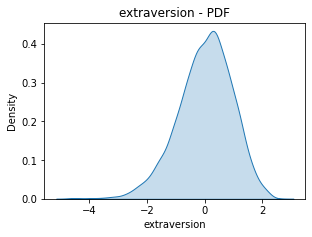

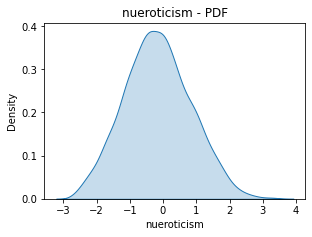

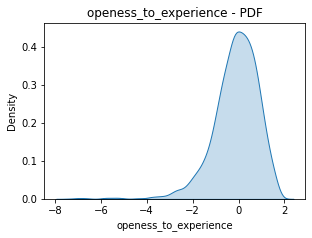

In [141]:
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    
    # PDF
    plt.subplot(2, 3, 1)
    sns.kdeplot(df[column], fill=True)
    plt.title(f'{column} - PDF')
    plt.tight_layout()
    plt.show()

### The x-axis represents the range of values present in the column, while the y-axis represents the density of those values (i.e., how frequently those values occur).
### KDE is a non-parametric way to estimate the probability density function of a random variable.
### The filled area under the curve represents the estimated probability density for each value or range of values.
### It is useful for understanding the distribution of data within each numerical column, including identifying peaks, valleys, and any potential skewness or multimodality in the data.

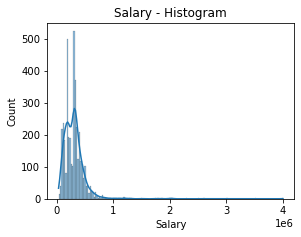

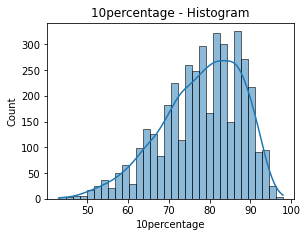

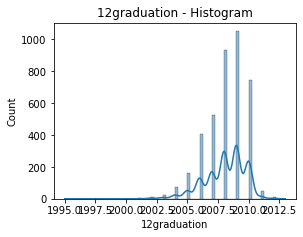

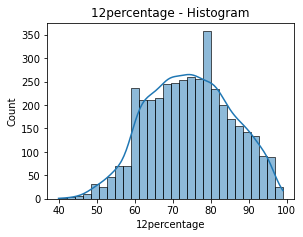

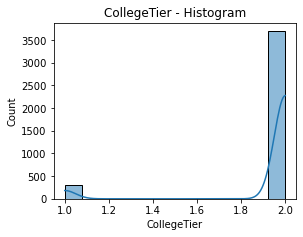

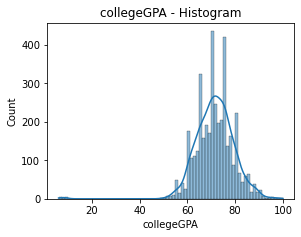

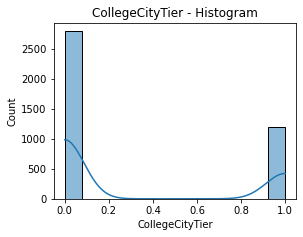

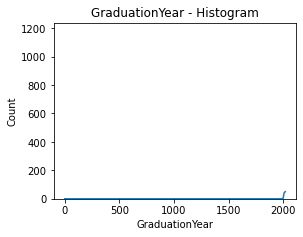

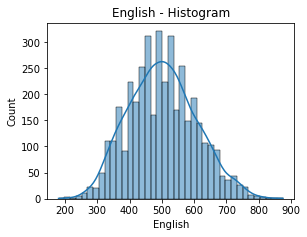

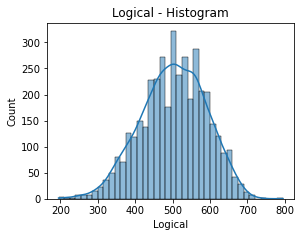

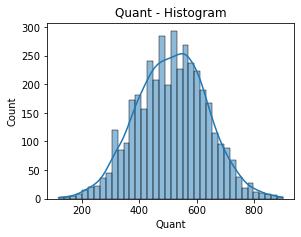

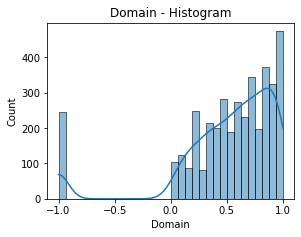

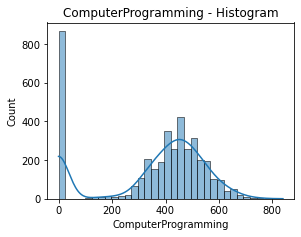

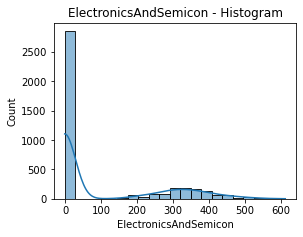

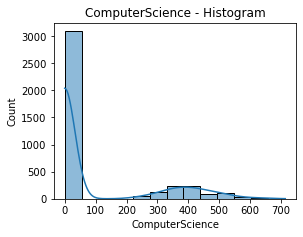

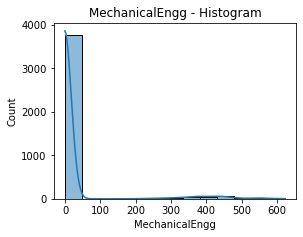

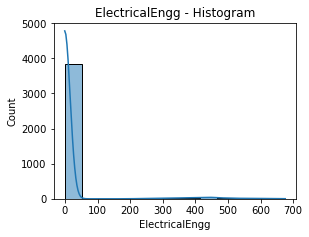

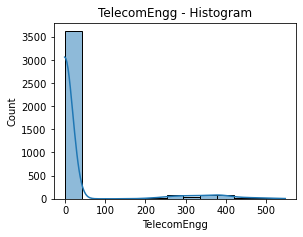

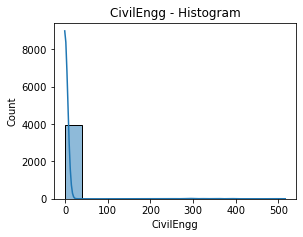

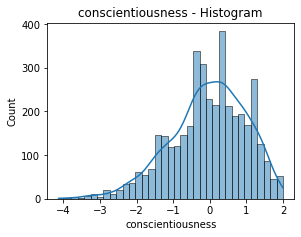

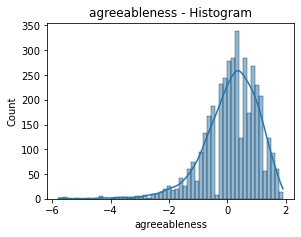

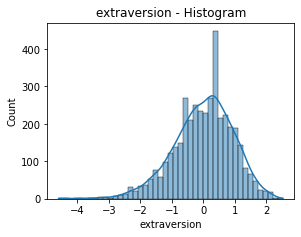

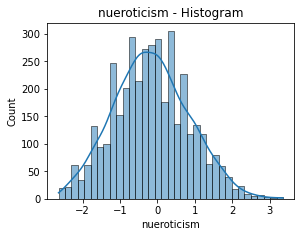

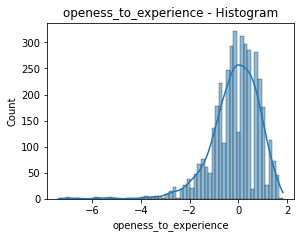

In [142]:
# Histogram
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(2,3,2)
    sns.histplot(df[column], kde=True)
    plt.title(f'{column} - Histogram')
    plt.tight_layout()
    plt.show()

### Each graph represents a histogram of the data in a specific numerical column of the DataFrame.
### The x-axis represents the range of values present in the column, while the y-axis represents the frequency of occurrence of those values.
### The bars on the graph represent the frequency (or count) of values falling within each bin or interval.
### Are useful for visualizing the distribution of data within each numerical column, including identifying the central tendency, spread, skewness, and presence of outliers

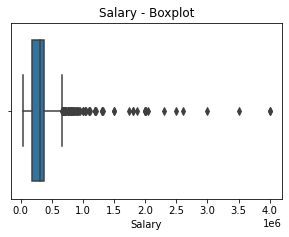

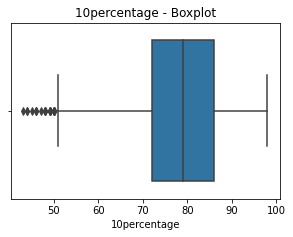

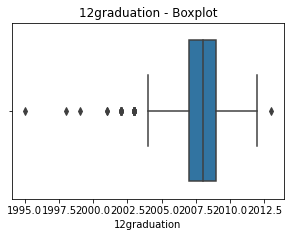

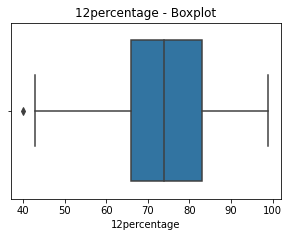

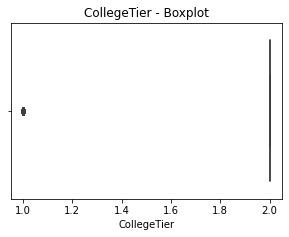

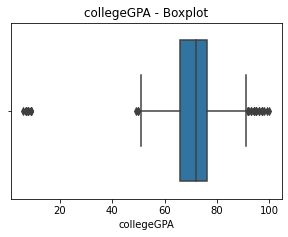

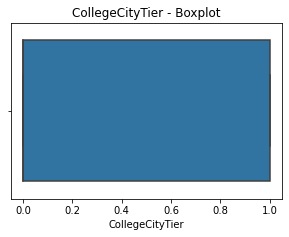

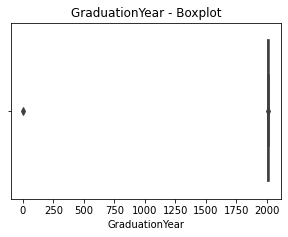

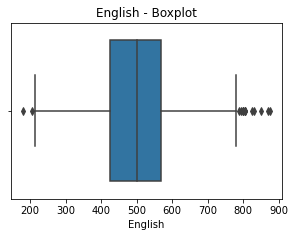

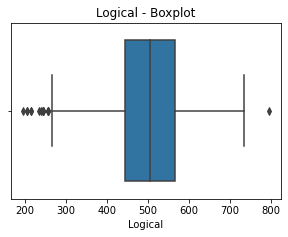

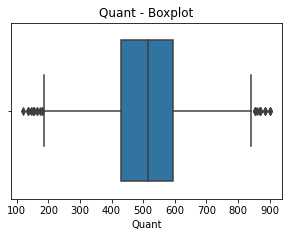

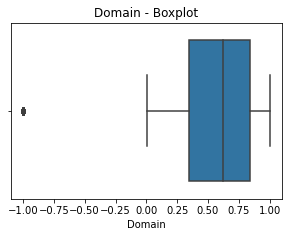

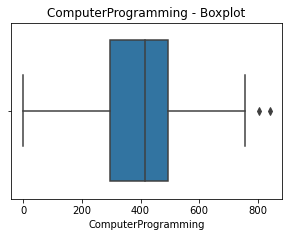

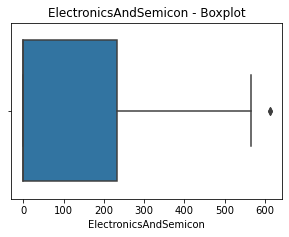

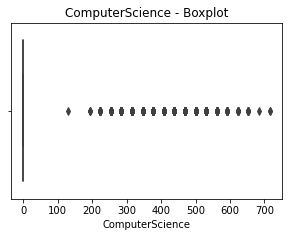

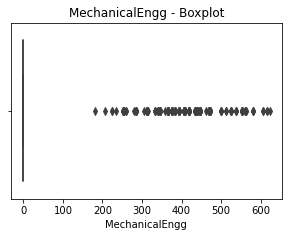

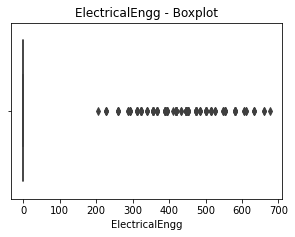

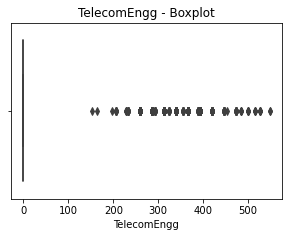

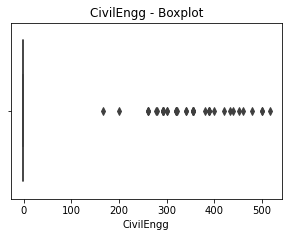

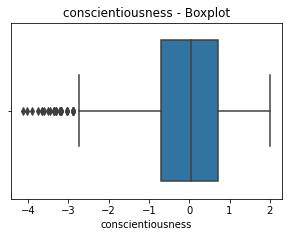

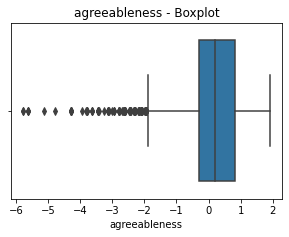

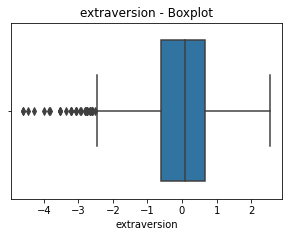

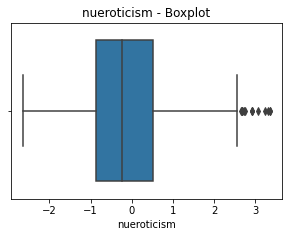

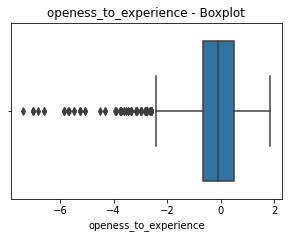

In [143]:
 # Boxplot
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 3, 3)
    sns.boxplot(x=df[column])
    plt.title(f'{column} - Boxplot')
    plt.tight_layout()
    plt.show()

### Box plots provide a visual summary of the central tendency, dispersion, and skewness of the data, as well as the presence of outliers.

In [144]:
  # Outlier detection using IQR
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
print(f'Outliers in {column}: {outliers}')
    
plt.tight_layout()
plt.show()

Outliers in openess_to_experience:       Salary        DOJ                        DOL  \
22    190000 2013-10-01 2015-04-01 00:00:00.000000   
23    180000 2014-08-01 2015-04-01 00:00:00.000000   
43    120000 2014-04-01 2015-04-01 00:00:00.000000   
63    150000 2014-10-01 2015-04-01 00:00:00.000000   
128   675000 2011-11-01 2024-02-23 10:16:26.697322   
...      ...        ...                        ...   
3868  320000 2013-06-01 2024-02-23 10:16:26.697322   
3892  300000 2014-08-01 2024-02-23 10:16:26.697322   
3901  390000 2013-07-01 2015-04-01 00:00:00.000000   
3918  120000 2014-08-01 2024-02-23 10:16:26.697322   
3957  180000 2012-09-01 2013-10-01 00:00:00.000000   

                         Designation    JobCity Gender        DOB  \
22                         developer  Hyderabad      m 1992-01-23   
23       electrical project engineer  Bengaluru      m 1986-07-30   
43                    .net developer  Hyderabad      m 1993-07-05   
63                management trainee    

<Figure size 432x288 with 0 Axes>

In [145]:
outliers

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
22,190000,2013-10-01,2015-04-01 00:00:00.000000,developer,Hyderabad,m,1992-01-23,92,"state board of secondary education, AP",2009,...,-1,-1,-1,-1,-1,-0.4463,-0.6201,-0.6048,0.7798,-2.7769
23,180000,2014-08-01,2015-04-01 00:00:00.000000,electrical project engineer,Bengaluru,m,1986-07-30,70,"state board of secondary education, AP",2006,...,-1,-1,-1,-1,-1,-0.7335,-2.1186,-1.9881,-0.4879,-5.0763
43,120000,2014-04-01,2015-04-01 00:00:00.000000,.net developer,Hyderabad,m,1993-07-05,59,"state board of secondary education, AP",2010,...,-1,-1,-1,-1,-1,-0.0154,-2.4516,-0.4511,0.2727,-3.1602
63,150000,2014-10-01,2015-04-01 00:00:00.000000,management trainee,bhiwadi,m,1992-01-10,61,up,2008,...,-1,446,-1,-1,-1,-2.2351,-2.6847,-2.6028,0.3995,-5.4770
128,675000,2011-11-01,2024-02-23 10:16:26.697322,senior software engineer,noida,m,1988-11-07,60,0,2004,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-0.6343,-0.6428,-2.9731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3868,320000,2013-06-01,2024-02-23 10:16:26.697322,project engineer,jaipur,m,1991-09-14,87,cbse,2009,...,-1,-1,-1,-1,388,0.5591,-0.6201,0.0100,-1.1218,-2.5853
3892,300000,2014-08-01,2024-02-23 10:16:26.697322,manufacturing engineer,noida,m,1992-04-04,78,cbse,2010,...,-1,-1,-1,-1,-1,-0.8772,-1.1196,0.0100,-1.5021,-2.7769
3901,390000,2013-07-01,2015-04-01 00:00:00.000000,software engineering associate,pune,m,1992-01-06,73,cbse,2009,...,-1,-1,-1,-1,-1,0.1282,0.2124,-0.1437,-1.3753,-2.7769
3918,120000,2014-08-01,2024-02-23 10:16:26.697322,system administrator,noida,f,1993-08-20,62,cbse,2010,...,-1,-1,-1,-1,-1,-0.8772,-1.6191,-1.6807,-0.3612,-2.9686


### Univariate visualization  of categorical data 

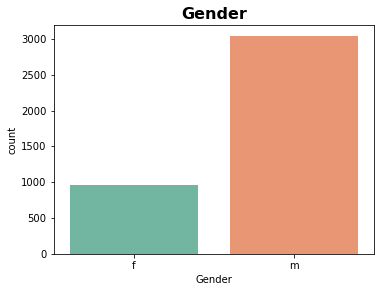

In [68]:
categorical_cols = ['Gender'] 

plt.figure(figsize=(10, 15))


for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=col, palette='Set2')  
    plt.title(col, fontsize=16, fontweight='bold')  

plt.tight_layout()
plt.show()

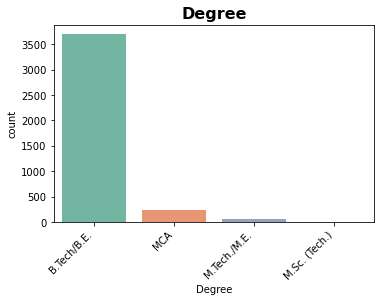

In [71]:
categorical_cols=['Degree']
plt.figure(figsize=(10, 15))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=col, palette='Set2')  
    plt.title(col, fontsize=16, fontweight='bold') 
    plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()   

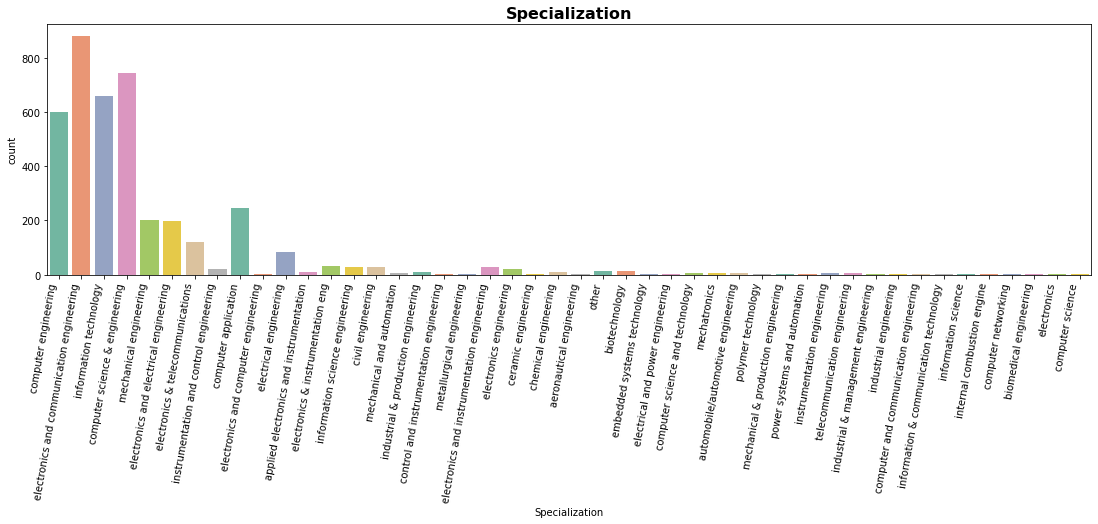

In [69]:
categorical_cols=['Specialization']
plt.figure(figsize=(30, 25))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=col, palette='Set2')  # Adjusted palette for better visibility
    plt.title(col, fontsize=16, fontweight='bold')  # Adjust title font size and weight
    plt.xticks(rotation=80, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()   

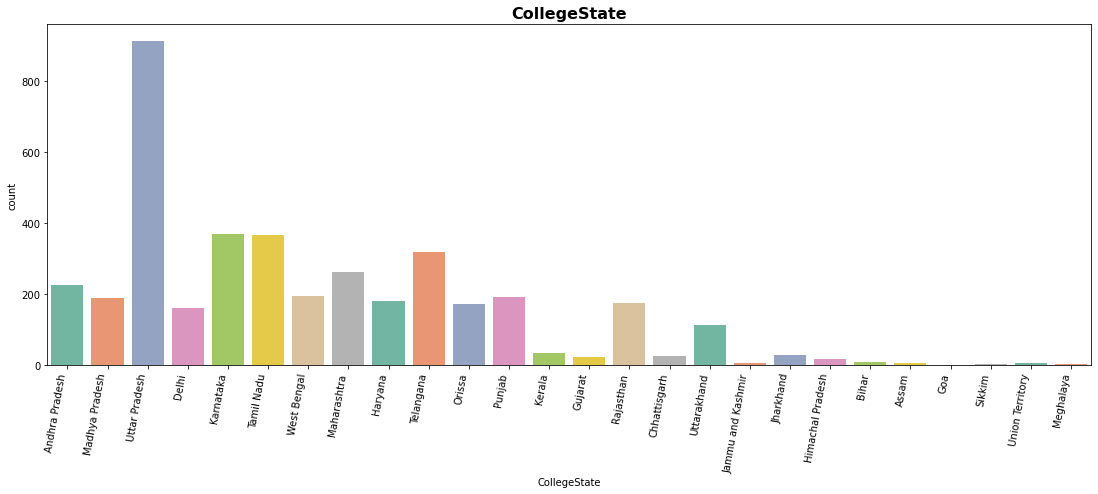

In [161]:
categorical_cols=['CollegeState']
plt.figure(figsize=(30, 25))


for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=col, palette='Set2')  # Adjusted palette for better visibility
    plt.title(col, fontsize=16, fontweight='bold')  # Adjust title font size and weight
    plt.xticks(rotation=80, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()   

In [84]:
designation =z['Designation'].value_counts().sort_values(ascending=False).nlargest(5)

Text(0.5, 1.0, 'Barh of Categorical column')

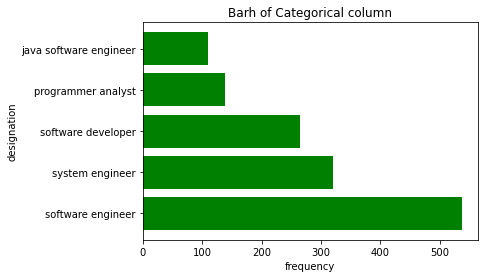

In [85]:
plt.barh(designation.index ,designation.values ,color='green')
plt.xlabel('frequency')
plt.ylabel('designation')
plt.title('Barh of Categorical column')

### Bivariate   vizualization and non visualization analysis [ numerical data vs numerical ]

In [138]:
numerical_columns = ['Salary', '10percentage', '12graduation', '12percentage',
                     'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
                     'CollegeCityTier', 'GraduationYear', 'English', 'Logical',
                     'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
                     'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
                     'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
                     'nueroticism', 'openess_to_experience']

###  salary vs 10%

In [139]:
from scipy.stats import pearsonr  
X = df['10percentage'].values.reshape(-1, 1)
y = df['Salary']
correlation_coefficient, p_value = pearsonr(df['Salary'], df['10percentage'])
print("Correlation Coefficient:", correlation_coefficient)
summary_stats = df[['Salary', '10percentage']].describe()
print(summary_stats)

Correlation Coefficient: 0.17737277344849328
             Salary  10percentage
count  3.998000e+03   3998.000000
mean   3.076998e+05     77.925443
std    2.127375e+05      9.850162
min    3.500000e+04     43.000000
25%    1.800000e+05     71.680000
50%    3.000000e+05     79.150000
75%    3.700000e+05     85.670000
max    4.000000e+06     97.760000


In [140]:
X = df['10percentage'].values.reshape(-1, 1)
y = df['Salary']
regression_model = LinearRegression().fit(X, y)
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Intercept: 9184.343793974898
Slope: 3830.783576018868


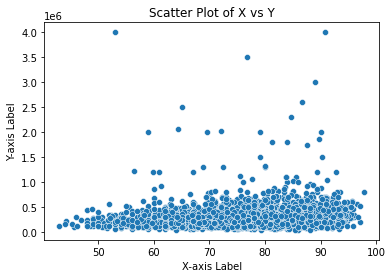

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

y =df['Salary']
x= df['10percentage']

sns.scatterplot(x=x, y=y)


plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot of X vs Y')


plt.show()

### salary vs 12graduation

In [142]:
X = df['12graduation'].values.reshape(-1, 1)
y = df['Salary']
correlation_coefficient, p_value = pearsonr(df['Salary'], df['12graduation'])
print("Correlation Coefficient:", correlation_coefficient)
summary_stats = df[['Salary', '12graduation']].describe()
print(summary_stats)
regression_model = LinearRegression().fit(X, y)
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Correlation Coefficient: -0.16138253540849307
             Salary  12graduation
count  3.998000e+03   3998.000000
mean   3.076998e+05   2008.087544
std    2.127375e+05      1.653599
min    3.500000e+04   1995.000000
25%    1.800000e+05   2007.000000
50%    3.000000e+05   2008.000000
75%    3.700000e+05   2009.000000
max    4.000000e+06   2013.000000
Intercept: 41999720.32992814
Slope: -20762.053232844162


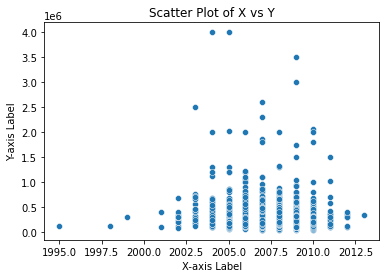

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt


y =df['Salary']
x= df['12graduation']

sns.scatterplot(x=x, y=y)


plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot of X vs Y')


plt.show()

### salary vs 12percentage

In [144]:
X = df['12percentage'].values.reshape(-1, 1)
y = df['Salary']
correlation_coefficient, p_value = pearsonr(df['Salary'], df['12percentage'])
print("Correlation Coefficient:", correlation_coefficient)
summary_stats = df[['Salary', '12percentage']].describe()
print(summary_stats)
regression_model = LinearRegression().fit(X, y)
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Correlation Coefficient: 0.17025447790246098
             Salary  12percentage
count  3.998000e+03   3998.000000
mean   3.076998e+05     74.466366
std    2.127375e+05     10.999933
min    3.500000e+04     40.000000
25%    1.800000e+05     66.000000
50%    3.000000e+05     74.400000
75%    3.700000e+05     82.600000
max    4.000000e+06     98.700000
Intercept: 62504.22926834042
Slope: 3292.7029325015146


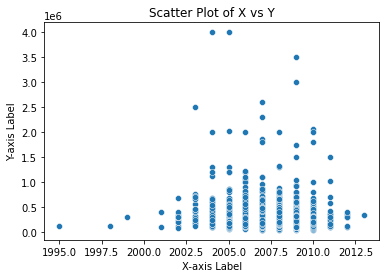

In [145]:
y =df['Salary']
x= df['12graduation']
sns.scatterplot(x=x, y=y)

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot of X vs Y')

plt.show()

### salary vs CollegeID

In [146]:
X = df['CollegeID'].values.reshape(-1, 1)
y = df['Salary']
correlation_coefficient, p_value = pearsonr(df['Salary'], df['CollegeID'])
print("Correlation Coefficient:", correlation_coefficient)
summary_stats = df[['Salary', 'CollegeID']].describe()
print(summary_stats)
regression_model = LinearRegression().fit(X, y)
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Correlation Coefficient: -0.11869027566156125
             Salary     CollegeID
count  3.998000e+03   3998.000000
mean   3.076998e+05   5156.851426
std    2.127375e+05   4802.261482
min    3.500000e+04      2.000000
25%    1.800000e+05    494.000000
50%    3.000000e+05   3879.000000
75%    3.700000e+05   8818.000000
max    4.000000e+06  18409.000000
Intercept: 334814.12547310506
Slope: -5.257912883226887


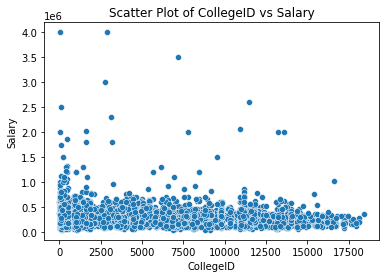

In [243]:
y =df['Salary']
x= df['CollegeID']
sns.scatterplot(x=x, y=y)

plt.xlabel('CollegeID')
plt.ylabel('Salary')
plt.title('Scatter Plot of CollegeID vs Salary')

plt.show()

### Salary vs CollegeTier

In [148]:
X = df['CollegeTier'].values.reshape(-1, 1)
y = df['Salary']
correlation_coefficient, p_value = pearsonr(df['Salary'], df['CollegeTier'])
print("Correlation Coefficient:", correlation_coefficient)
summary_stats = df[['Salary', 'CollegeTier']].describe()
print(summary_stats)
regression_model = LinearRegression().fit(X, y)
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Correlation Coefficient: -0.17933210878954042
             Salary  CollegeTier
count  3.998000e+03  3998.000000
mean   3.076998e+05     1.925713
std    2.127375e+05     0.262270
min    3.500000e+04     1.000000
25%    1.800000e+05     2.000000
50%    3.000000e+05     2.000000
75%    3.700000e+05     2.000000
max    4.000000e+06     2.000000
Intercept: 587819.9922306914
Slope: -145463.08987378931


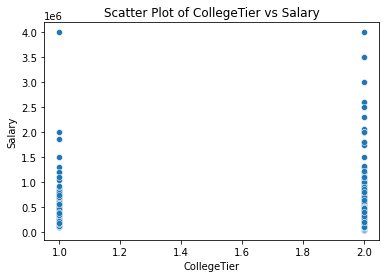

In [245]:
y =df['Salary']
x= df['CollegeTier']
sns.scatterplot(x=x, y=y)

plt.xlabel('CollegeTier')
plt.ylabel('Salary')
plt.title('Scatter Plot of CollegeTier vs Salary')

plt.show()

### Salary vs  collegeGPA

In [150]:
X = df['collegeGPA'].values.reshape(-1, 1)
y = df['Salary']
correlation_coefficient, p_value = pearsonr(df['Salary'], df['collegeGPA'])
print("Correlation Coefficient:", correlation_coefficient)
summary_stats = df[['Salary', 'collegeGPA']].describe()
print(summary_stats)
regression_model = LinearRegression().fit(X, y)
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Correlation Coefficient: 0.1301025190711257
             Salary   collegeGPA
count  3.998000e+03  3998.000000
mean   3.076998e+05    71.486171
std    2.127375e+05     8.167338
min    3.500000e+04     6.450000
25%    1.800000e+05    66.407500
50%    3.000000e+05    71.720000
75%    3.700000e+05    76.327500
max    4.000000e+06    99.930000
Intercept: 65445.669888319244
Slope: 3388.8258113868515


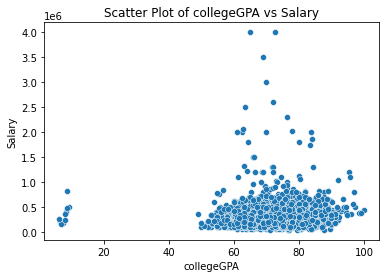

In [246]:
y =df['Salary']
x= df['collegeGPA']

sns.scatterplot(x=x, y=y)

plt.xlabel('collegeGPA')
plt.ylabel('Salary')
plt.title('Scatter Plot of collegeGPA vs Salary')

plt.show()

### Salary vs CollegeCityTier

In [152]:
X = df['CollegeCityTier'].values.reshape(-1, 1)
y = df['Salary']
correlation_coefficient, p_value = pearsonr(df['Salary'], df['CollegeCityTier'])
print("Correlation Coefficient:", correlation_coefficient)
summary_stats = df[['Salary', 'CollegeCityTier']].describe()
print(summary_stats)
regression_model = LinearRegression().fit(X, y)
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Correlation Coefficient: 0.015383719708127498
             Salary  CollegeCityTier
count  3.998000e+03      3998.000000
mean   3.076998e+05         0.300400
std    2.127375e+05         0.458489
min    3.500000e+04         0.000000
25%    1.800000e+05         0.000000
50%    3.000000e+05         0.000000
75%    3.700000e+05         1.000000
max    4.000000e+06         1.000000
Intercept: 305555.5952806579
Slope: 7137.9933954453845


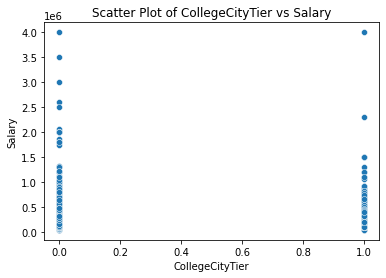

In [247]:
y =df['Salary']
x= df['CollegeCityTier']
sns.scatterplot(x=x, y=y)

plt.xlabel('CollegeCityTier')
plt.ylabel('Salary')
plt.title('Scatter Plot of CollegeCityTier vs Salary')

plt.show()

### Salary vs  GraduationYear

In [154]:
X = df['GraduationYear'].values.reshape(-1, 1)
y = df['Salary']
correlation_coefficient, p_value = pearsonr(df['Salary'], df['GraduationYear'])
print("Correlation Coefficient:", correlation_coefficient)
summary_stats = df[['Salary', 'GraduationYear']].describe()
print(summary_stats)
regression_model = LinearRegression().fit(X, y)
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Correlation Coefficient: -0.010053044603318934
             Salary  GraduationYear
count  3.998000e+03     3998.000000
mean   3.076998e+05     2012.105803
std    2.127375e+05       31.857271
min    3.500000e+04        0.000000
25%    1.800000e+05     2012.000000
50%    3.000000e+05     2013.000000
75%    3.700000e+05     2014.000000
max    4.000000e+06     2017.000000
Intercept: 442777.62609981484
Slope: -67.13254143001356


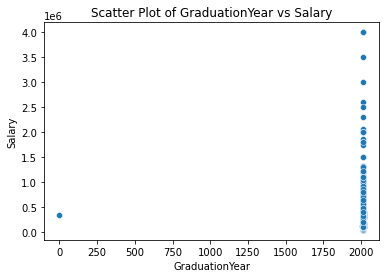

In [248]:
y =df['Salary']
x= df['GraduationYear']
sns.scatterplot(x=x, y=y)

plt.xlabel('GraduationYear')
plt.ylabel('Salary')
plt.title('Scatter Plot of GraduationYear vs Salary')

plt.show()

### Salary vs  English'

In [156]:
X = df['English'].values.reshape(-1, 1)
y = df['Salary']
correlation_coefficient, p_value = pearsonr(df['Salary'], df['English'])
print("Correlation Coefficient:", correlation_coefficient)
summary_stats = df[['Salary', 'English']].describe()
print(summary_stats)
regression_model = LinearRegression().fit(X, y)
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Correlation Coefficient: 0.1782190449753711
             Salary      English
count  3.998000e+03  3998.000000
mean   3.076998e+05   501.649075
std    2.127375e+05   104.940021
min    3.500000e+04   180.000000
25%    1.800000e+05   425.000000
50%    3.000000e+05   500.000000
75%    3.700000e+05   570.000000
max    4.000000e+06   875.000000
Intercept: 126458.6066621707
Slope: 361.29089529363216


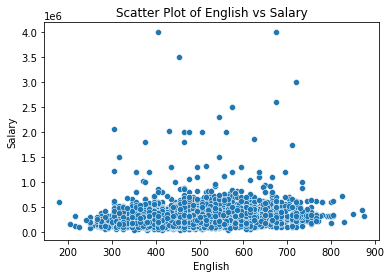

In [249]:
y =df['Salary']
x= df['English']

sns.scatterplot(x=x, y=y)

plt.xlabel('English')
plt.ylabel('Salary')
plt.title('Scatter Plot of English vs Salary')
plt.show()

 ### Salary vs logical

In [158]:
X = df['Logical'].values.reshape(-1, 1)
y = df['Salary']
correlation_coefficient, p_value = pearsonr(df['Salary'], df['Logical'])
print("Correlation Coefficient:", correlation_coefficient)
summary_stats = df[['Salary', 'Logical']].describe()
print(summary_stats)
regression_model = LinearRegression().fit(X, y)
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Correlation Coefficient: 0.17927496648308666
             Salary      Logical
count  3.998000e+03  3998.000000
mean   3.076998e+05   501.598799
std    2.127375e+05    86.783297
min    3.500000e+04   195.000000
25%    1.800000e+05   445.000000
50%    3.000000e+05   505.000000
75%    3.700000e+05   565.000000
max    4.000000e+06   795.000000
Intercept: 87263.07706079274
Slope: 439.46830241217214


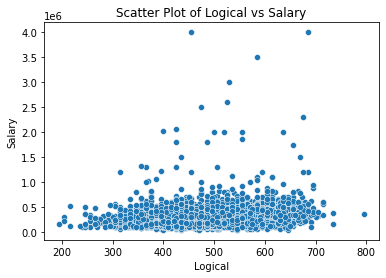

In [250]:
y =df['Salary']
x= df['Logical']

sns.scatterplot(x=x, y=y)

plt.xlabel('Logical')
plt.ylabel('Salary')
plt.title('Scatter Plot of Logical vs Salary')

plt.show()

### ### Salary vs Quant

In [160]:
X = df['Quant'].values.reshape(-1, 1)
y = df['Salary']
correlation_coefficient, p_value = pearsonr(df['Salary'], df['Quant'])
print("Correlation Coefficient:", correlation_coefficient)
summary_stats = df[['Salary', 'Quant']].describe()
print(summary_stats)
regression_model = LinearRegression().fit(X, y)
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Correlation Coefficient: 0.23062742818671128
             Salary        Quant
count  3.998000e+03  3998.000000
mean   3.076998e+05   513.378189
std    2.127375e+05   122.302332
min    3.500000e+04   120.000000
25%    1.800000e+05   430.000000
50%    3.000000e+05   515.000000
75%    3.700000e+05   595.000000
max    4.000000e+06   900.000000
Intercept: 101751.80073505922
Slope: 401.1624443047277


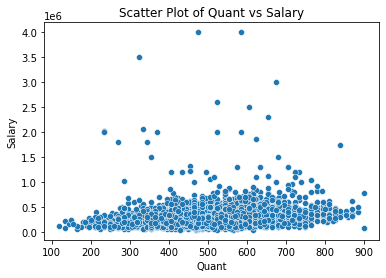

In [256]:
y =df['Salary']
x= df['Quant']

sns.scatterplot(x=x, y=y)

plt.xlabel('Quant')
plt.ylabel('Salary')
plt.title('Scatter Plot of Quant vs Salary')

# Show plot
plt.show()

 ### Salary vs Domain

In [162]:
X = df['Domain'].values.reshape(-1, 1)
y = df['Salary']
correlation_coefficient, p_value = pearsonr(df['Salary'], df['Domain'])
print("Correlation Coefficient:", correlation_coefficient)
summary_stats = df[['Salary', 'Domain']].describe()
print(summary_stats)
regression_model = LinearRegression().fit(X, y)
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Correlation Coefficient: 0.1046555370987683
             Salary       Domain
count  3.998000e+03  3998.000000
mean   3.076998e+05     0.510490
std    2.127375e+05     0.468671
min    3.500000e+04    -1.000000
25%    1.800000e+05     0.342315
50%    3.000000e+05     0.622643
75%    3.700000e+05     0.842248
max    4.000000e+06     0.999910
Intercept: 283449.12023813406
Slope: 47504.840782103834


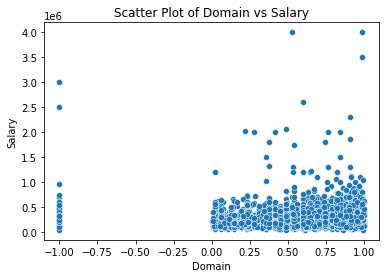

In [257]:
y =df['Salary']
x= df['Domain']

sns.scatterplot(x=x, y=y)

plt.xlabel('Domain')
plt.ylabel('Salary')
plt.title('Scatter Plot of Domain vs Salary')

plt.show()

 ### Salary vsComputerProgramming

In [164]:
X = df['ComputerProgramming'].values.reshape(-1, 1)
y = df['Salary']
correlation_coefficient, p_value = pearsonr(df['Salary'], df['ComputerProgramming'])
print("Correlation Coefficient:", correlation_coefficient)
summary_stats = df[['Salary', 'ComputerProgramming']].describe()
print(summary_stats)
regression_model = LinearRegression().fit(X, y)
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Correlation Coefficient: 0.1156647962377944
             Salary  ComputerProgramming
count  3.998000e+03          3998.000000
mean   3.076998e+05           353.102801
std    2.127375e+05           205.355519
min    3.500000e+04            -1.000000
25%    1.800000e+05           295.000000
50%    3.000000e+05           415.000000
75%    3.700000e+05           495.000000
max    4.000000e+06           840.000000
Intercept: 265390.14160044113
Slope: 119.8226356649841


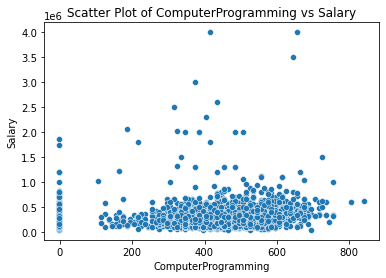

In [258]:
y =df['Salary']
x= df['ComputerProgramming']

sns.scatterplot(x=x, y=y)

plt.xlabel('ComputerProgramming')
plt.ylabel('Salary')
plt.title('Scatter Plot of ComputerProgramming vs Salary')

plt.show()

 ### Salary vs ElectronicsAndSemicon

In [166]:
X = df['ElectronicsAndSemicon'].values.reshape(-1, 1)
y = df['Salary']
correlation_coefficient, p_value = pearsonr(df['Salary'], df['ElectronicsAndSemicon'])
print("Correlation Coefficient:", correlation_coefficient)
summary_stats = df[['Salary', 'ElectronicsAndSemicon']].describe()
print(summary_stats)
regression_model = LinearRegression().fit(X, y)
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Correlation Coefficient: 0.0006654268825324813
             Salary  ElectronicsAndSemicon
count  3.998000e+03            3998.000000
mean   3.076998e+05              95.328414
std    2.127375e+05             158.241218
min    3.500000e+04              -1.000000
25%    1.800000e+05              -1.000000
50%    3.000000e+05              -1.000000
75%    3.700000e+05             233.000000
max    4.000000e+06             612.000000
Intercept: 307614.5699343515
Slope: 0.8945915162896804


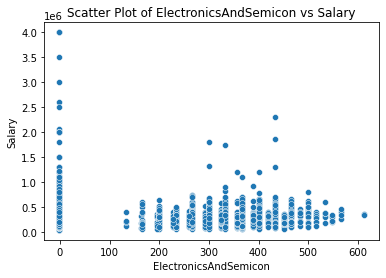

In [259]:
y =df['Salary']
x= df['ElectronicsAndSemicon']

sns.scatterplot(x=x, y=y)
plt.xlabel('ElectronicsAndSemicon')
plt.ylabel('Salary')
plt.title('Scatter Plot of ElectronicsAndSemicon vs Salary')

plt.show()

### Salary vs ComputerScience

In [168]:
X = df['ComputerScience'].values.reshape(-1, 1)
y = df['Salary']
correlation_coefficient, p_value = pearsonr(df['Salary'], df['ComputerScience'])
print("Correlation Coefficient:", correlation_coefficient)
summary_stats = df[['Salary', 'ComputerScience']].describe()
print(summary_stats)
regression_model = LinearRegression().fit(X, y)
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Correlation Coefficient: -0.10071969019180428
             Salary  ComputerScience
count  3.998000e+03      3998.000000
mean   3.076998e+05        90.742371
std    2.127375e+05       175.273083
min    3.500000e+04        -1.000000
25%    1.800000e+05        -1.000000
50%    3.000000e+05        -1.000000
75%    3.700000e+05        -1.000000
max    4.000000e+06       715.000000
Intercept: 318792.96019382053
Slope: -122.24840638305108


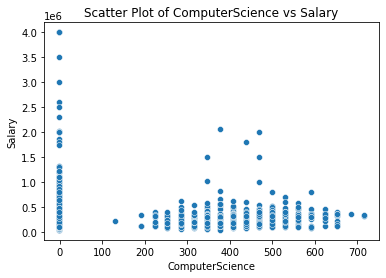

In [260]:
y =df['Salary']
x= df['ComputerScience']

sns.scatterplot(x=x, y=y)

plt.xlabel('ComputerScience')
plt.ylabel('Salary')
plt.title('Scatter Plot of ComputerScience vs Salary')

# Show plot
plt.show()

### Salary vs MechanicalEngg

In [170]:
X = df['MechanicalEngg'].values.reshape(-1, 1)
y = df['Salary']
correlation_coefficient, p_value = pearsonr(df['Salary'], df['MechanicalEngg'])
print("Correlation Coefficient:", correlation_coefficient)
summary_stats = df[['Salary', 'MechanicalEngg']].describe()
print(summary_stats)
regression_model = LinearRegression().fit(X, y)
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Correlation Coefficient: 0.01847481441661867
             Salary  MechanicalEngg
count  3.998000e+03     3998.000000
mean   3.076998e+05       22.974737
std    2.127375e+05       98.123311
min    3.500000e+04       -1.000000
25%    1.800000e+05       -1.000000
50%    3.000000e+05       -1.000000
75%    3.700000e+05       -1.000000
max    4.000000e+06      623.000000
Intercept: 306779.60698351945
Slope: 40.05455760714872


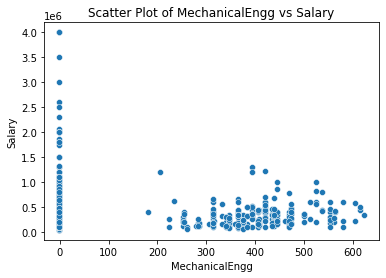

In [261]:
y =df['Salary']
x= df['MechanicalEngg']

sns.scatterplot(x=x, y=y)

plt.xlabel('MechanicalEngg')
plt.ylabel('Salary')
plt.title('Scatter Plot of MechanicalEngg vs Salary')

plt.show()

### Salary vs  ElectricalEngg

In [172]:
X = df['ElectricalEngg'].values.reshape(-1, 1)
y = df['Salary']
correlation_coefficient, p_value = pearsonr(df['Salary'], df['ElectricalEngg'])
print("Correlation Coefficient:", correlation_coefficient)
summary_stats = df[['Salary', 'ElectricalEngg']].describe()
print(summary_stats)
regression_model = LinearRegression().fit(X, y)
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Correlation Coefficient: -0.04759846766543162
             Salary  ElectricalEngg
count  3.998000e+03     3998.000000
mean   3.076998e+05       16.478739
std    2.127375e+05       87.585634
min    3.500000e+04       -1.000000
25%    1.800000e+05       -1.000000
50%    3.000000e+05       -1.000000
75%    3.700000e+05       -1.000000
max    4.000000e+06      676.000000
Intercept: 309604.995330747
Slope: -115.61232707456148


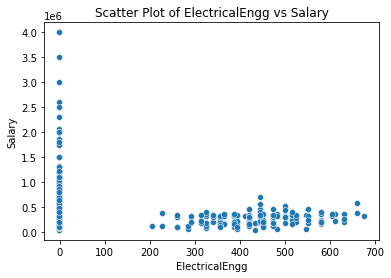

In [262]:
y =df['Salary']
x= df['ElectricalEngg']

sns.scatterplot(x=x, y=y)

plt.xlabel('ElectricalEngg')
plt.ylabel('Salary')
plt.title('Scatter Plot of ElectricalEngg vs Salary')

plt.show()

### Salary vs  TelecomEngg

In [174]:
X = df['TelecomEngg'].values.reshape(-1, 1)
y = df['Salary']
correlation_coefficient, p_value = pearsonr(df['Salary'], df['TelecomEngg'])
print("Correlation Coefficient:", correlation_coefficient)
summary_stats = df[['Salary', 'TelecomEngg']].describe()
print(summary_stats)
regression_model = LinearRegression().fit(X, y)
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Correlation Coefficient: -0.022690778493099265
             Salary  TelecomEngg
count  3.998000e+03  3998.000000
mean   3.076998e+05    31.851176
std    2.127375e+05   104.852845
min    3.500000e+04    -1.000000
25%    1.800000e+05    -1.000000
50%    3.000000e+05    -1.000000
75%    3.700000e+05    -1.000000
max    4.000000e+06   548.000000
Intercept: 309166.20346843364
Slope: -46.037658466618055


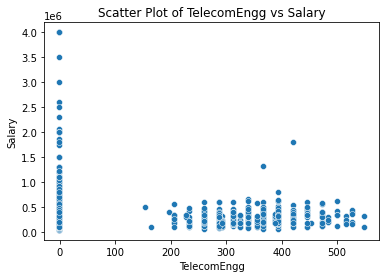

In [265]:
y =df['Salary']
x= df['TelecomEngg']

sns.scatterplot(x=x, y=y)

plt.xlabel('TelecomEngg')
plt.ylabel('Salary')
plt.title('Scatter Plot of TelecomEngg vs Salary')

plt.show()

### Salary vs  CivilEngg

In [176]:
X = df['CivilEngg'].values.reshape(-1, 1)
y = df['Salary']
correlation_coefficient, p_value = pearsonr(df['Salary'], df['CivilEngg'])
print("Correlation Coefficient:", correlation_coefficient)
summary_stats = df[['Salary', 'CivilEngg']].describe()
print(summary_stats)
regression_model = LinearRegression().fit(X, y)
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Correlation Coefficient: 0.037638690890255844
             Salary    CivilEngg
count  3.998000e+03  3998.000000
mean   3.076998e+05     2.683842
std    2.127375e+05    36.658505
min    3.500000e+04    -1.000000
25%    1.800000e+05    -1.000000
50%    3.000000e+05    -1.000000
75%    3.700000e+05    -1.000000
max    4.000000e+06   516.000000
Intercept: 307113.62977096345
Slope: 218.42573864754888


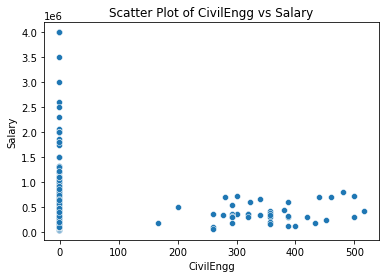

In [263]:
y =df['Salary']
x= df['CivilEngg']

sns.scatterplot(x=x, y=y)

plt.xlabel('CivilEngg')
plt.ylabel('Salary')
plt.title('Scatter Plot of CivilEngg vs Salary')

# Show plot
plt.show()

### Salary vs  conscientiousness

In [178]:
X = df['conscientiousness'].values.reshape(-1, 1)
y = df['Salary']
correlation_coefficient, p_value = pearsonr(df['Salary'], df['conscientiousness'])
print("Correlation Coefficient:", correlation_coefficient)
summary_stats = df[['Salary', 'conscientiousness']].describe()
print(summary_stats)
regression_model = LinearRegression().fit(X, y)
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Correlation Coefficient: -0.06414849352398533
             Salary  conscientiousness
count  3.998000e+03        3998.000000
mean   3.076998e+05          -0.037831
std    2.127375e+05           1.028666
min    3.500000e+04          -4.126700
25%    1.800000e+05          -0.713525
50%    3.000000e+05           0.046400
75%    3.700000e+05           0.702700
max    4.000000e+06           1.995300
Intercept: 307197.9611849103
Slope: -13266.497956876363


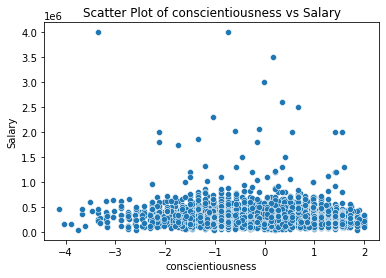

In [266]:
y =df['Salary']
x= df['conscientiousness']

sns.scatterplot(x=x, y=y)

plt.xlabel('conscientiousness')
plt.ylabel('Salary')
plt.title('Scatter Plot of conscientiousness vs Salary')

plt.show()

### Salary vs   agreeableness

In [180]:
X = df['agreeableness'].values.reshape(-1, 1)
y = df['Salary']
correlation_coefficient, p_value = pearsonr(df['Salary'], df['agreeableness'])
print("Correlation Coefficient:", correlation_coefficient)
summary_stats = df[['Salary','agreeableness']].describe()
print(summary_stats)
regression_model = LinearRegression().fit(X, y)
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Correlation Coefficient: 0.057422933553831074
             Salary  agreeableness
count  3.998000e+03    3998.000000
mean   3.076998e+05       0.146496
std    2.127375e+05       0.941782
min    3.500000e+04      -5.781600
25%    1.800000e+05      -0.287100
50%    3.000000e+05       0.212400
75%    3.700000e+05       0.812800
max    4.000000e+06       1.904800
Intercept: 305799.62851198384
Slope: 12971.1644688136


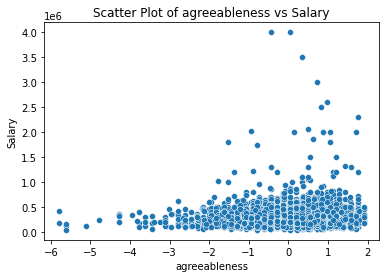

In [267]:
y =df['Salary']
x= df['agreeableness']

sns.scatterplot(x=x, y=y)

plt.xlabel('agreeableness')
plt.ylabel('Salary')
plt.title('Scatter Plot of agreeableness vs Salary')

plt.show()

### Salary vs extraversion

In [182]:
X = df['extraversion'].values.reshape(-1, 1)
y = df['Salary']
correlation_coefficient, p_value = pearsonr(df['Salary'], df['extraversion'])
print("Correlation Coefficient:", correlation_coefficient)
summary_stats = df[['Salary','extraversion']].describe()
print(summary_stats)
regression_model = LinearRegression().fit(X, y)
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Correlation Coefficient: -0.010212681473992107
             Salary  extraversion
count  3.998000e+03   3998.000000
mean   3.076998e+05      0.002763
std    2.127375e+05      0.951471
min    3.500000e+04     -4.600900
25%    1.800000e+05     -0.604800
50%    3.000000e+05      0.091400
75%    3.700000e+05      0.672000
max    4.000000e+06      2.535400
Intercept: 307706.1590052697
Slope: -2283.4319840030917


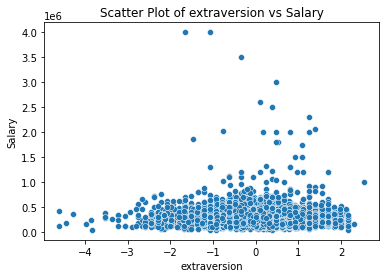

In [268]:
y =df['Salary']
x= df['extraversion']

sns.scatterplot(x=x, y=y)

plt.xlabel('extraversion')
plt.ylabel('Salary')
plt.title('Scatter Plot of extraversion vs Salary')

plt.show()

### Salary vs nueroticism

In [184]:
X = df['nueroticism'].values.reshape(-1, 1)
y = df['Salary']
correlation_coefficient, p_value = pearsonr(df['Salary'], df['nueroticism'])
print("Correlation Coefficient:", correlation_coefficient)
summary_stats = df[['Salary','nueroticism']].describe()
print(summary_stats)
regression_model = LinearRegression().fit(X, y)
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Correlation Coefficient: -0.05468541624883031
             Salary  nueroticism
count  3.998000e+03  3998.000000
mean   3.076998e+05    -0.169033
std    2.127375e+05     1.007580
min    3.500000e+04    -2.643000
25%    1.800000e+05    -0.868200
50%    3.000000e+05    -0.234400
75%    3.700000e+05     0.526200
max    4.000000e+06     3.352500
Intercept: 305748.1789898421
Slope: -11546.123449913626


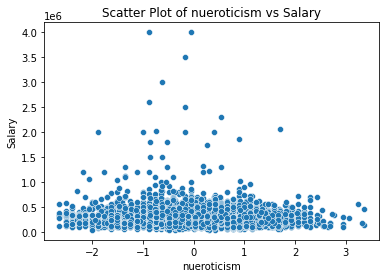

In [269]:
y =df['Salary']
x= df['nueroticism']

sns.scatterplot(x=x, y=y)

plt.xlabel('nueroticism')
plt.ylabel('Salary')
plt.title('Scatter Plot of nueroticism vs Salary')

plt.show()

### Salary vs  openess_to_experience

In [186]:
X = df['openess_to_experience'].values.reshape(-1, 1)
y = df['Salary']
correlation_coefficient, p_value = pearsonr(df['Salary'], df['openess_to_experience'])
print("Correlation Coefficient:", correlation_coefficient)
summary_stats = df[['Salary','openess_to_experience']].describe()
print(summary_stats)
regression_model = LinearRegression().fit(X, y)
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Correlation Coefficient: -0.011312268472631571
             Salary  openess_to_experience
count  3.998000e+03            3998.000000
mean   3.076998e+05              -0.138110
std    2.127375e+05               1.008075
min    3.500000e+04              -7.375700
25%    1.800000e+05              -0.669200
50%    3.000000e+05              -0.094300
75%    3.700000e+05               0.502400
max    4.000000e+06               1.822400
Intercept: 307370.1438510881
Slope: -2387.267573153081


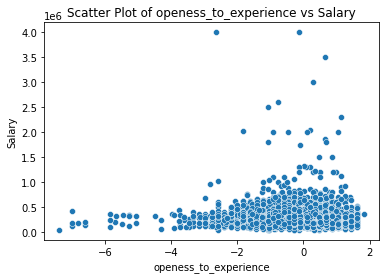

In [270]:
y =df['Salary']
x= df['openess_to_experience']

sns.scatterplot(x=x, y=y)

plt.xlabel('openess_to_experience')
plt.ylabel('Salary')
plt.title('Scatter Plot of openess_to_experience vs Salary')

plt.show()

### Bivariate - Visualization Analysis  on Numerical Data vs Categorical

 ### Gender vs Salary

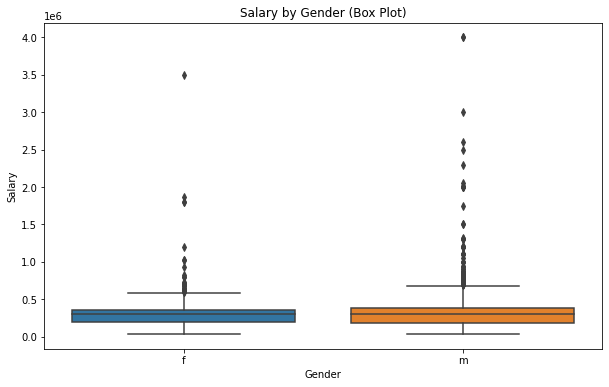

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Salary')
plt.title('Salary by Gender (Box Plot)')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

### Salary vs JobCity

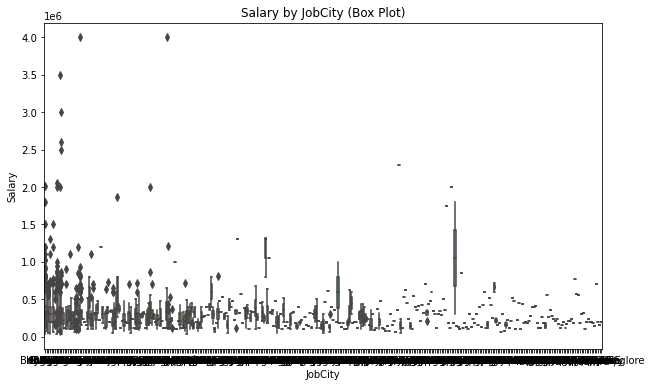

In [189]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='JobCity', y='Salary')
plt.title('Salary by JobCity (Box Plot)')
plt.xlabel('JobCity')
plt.ylabel('Salary')
plt.show()

Median Salary: The line inside each box represents the median salary for each job category. This gives an indication of the central tendency of salaries within each job type.

Interquartile Range (IQR): The box itself represents the interquartile range, which encompasses the middle 50% of the data. The lower and upper edges of the box represent the first and third quartiles, respectively. This gives an idea of the spread of salaries within each job category.

Outliers: Individual data points outside the whiskers (lines extending from the box) are considered outliers. These points represent salaries that are unusually high or low compared to the rest of the data within each job category.

Comparison between Job Categories: By comparing the box plots for different job categories, you can assess differences in salary distributions between those categories. For example, if one box plot has a higher median or wider interquartile range compared to another, it suggests differences in salary distribution between those job types.

 ###  Salary vs Designation

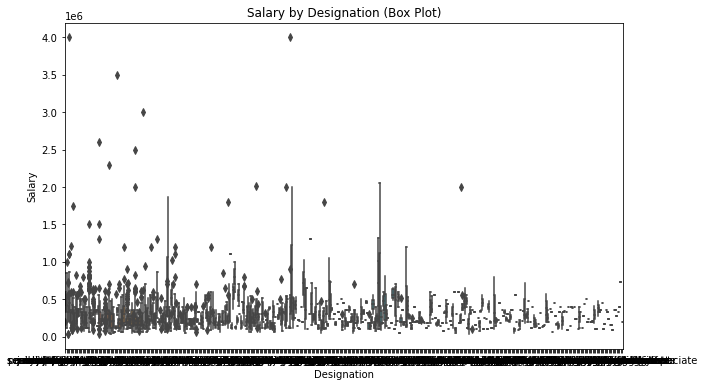

In [190]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Designation', y='Salary')
plt.title('Salary by Designation (Box Plot)')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.show()

 ### Salary vs  10board

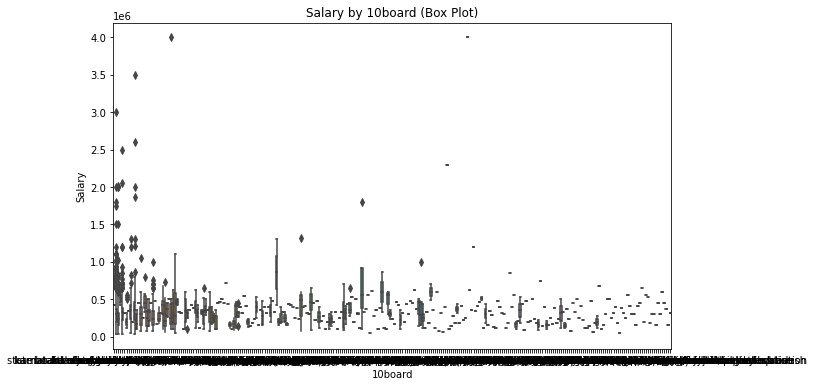

In [191]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='10board', y='Salary')
plt.title('Salary by 10board (Box Plot)')
plt.xlabel('10board')
plt.ylabel('Salary')
plt.show()


### Salary vs 12board

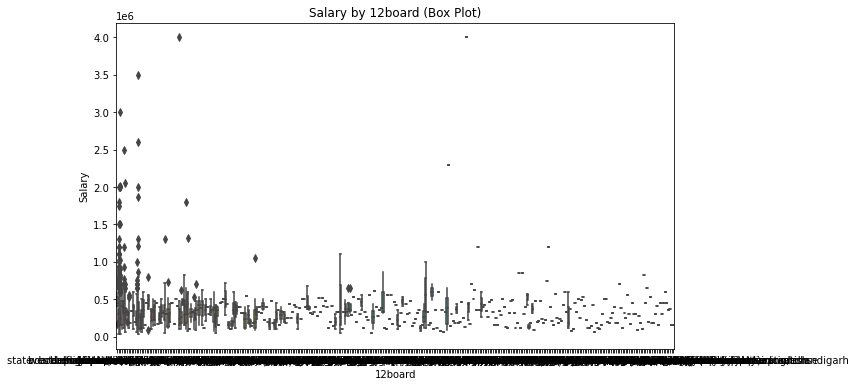

In [192]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='12board', y='Salary')
plt.title('Salary by 12board (Box Plot)')
plt.xlabel('12board')
plt.ylabel('Salary')
plt.show()

 ### Salary vs Degree

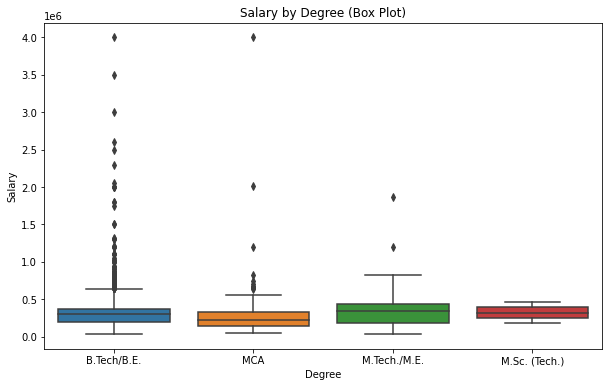

In [193]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Degree', y='Salary')
plt.title('Salary by Degree (Box Plot)')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

### Salary vs Specialization

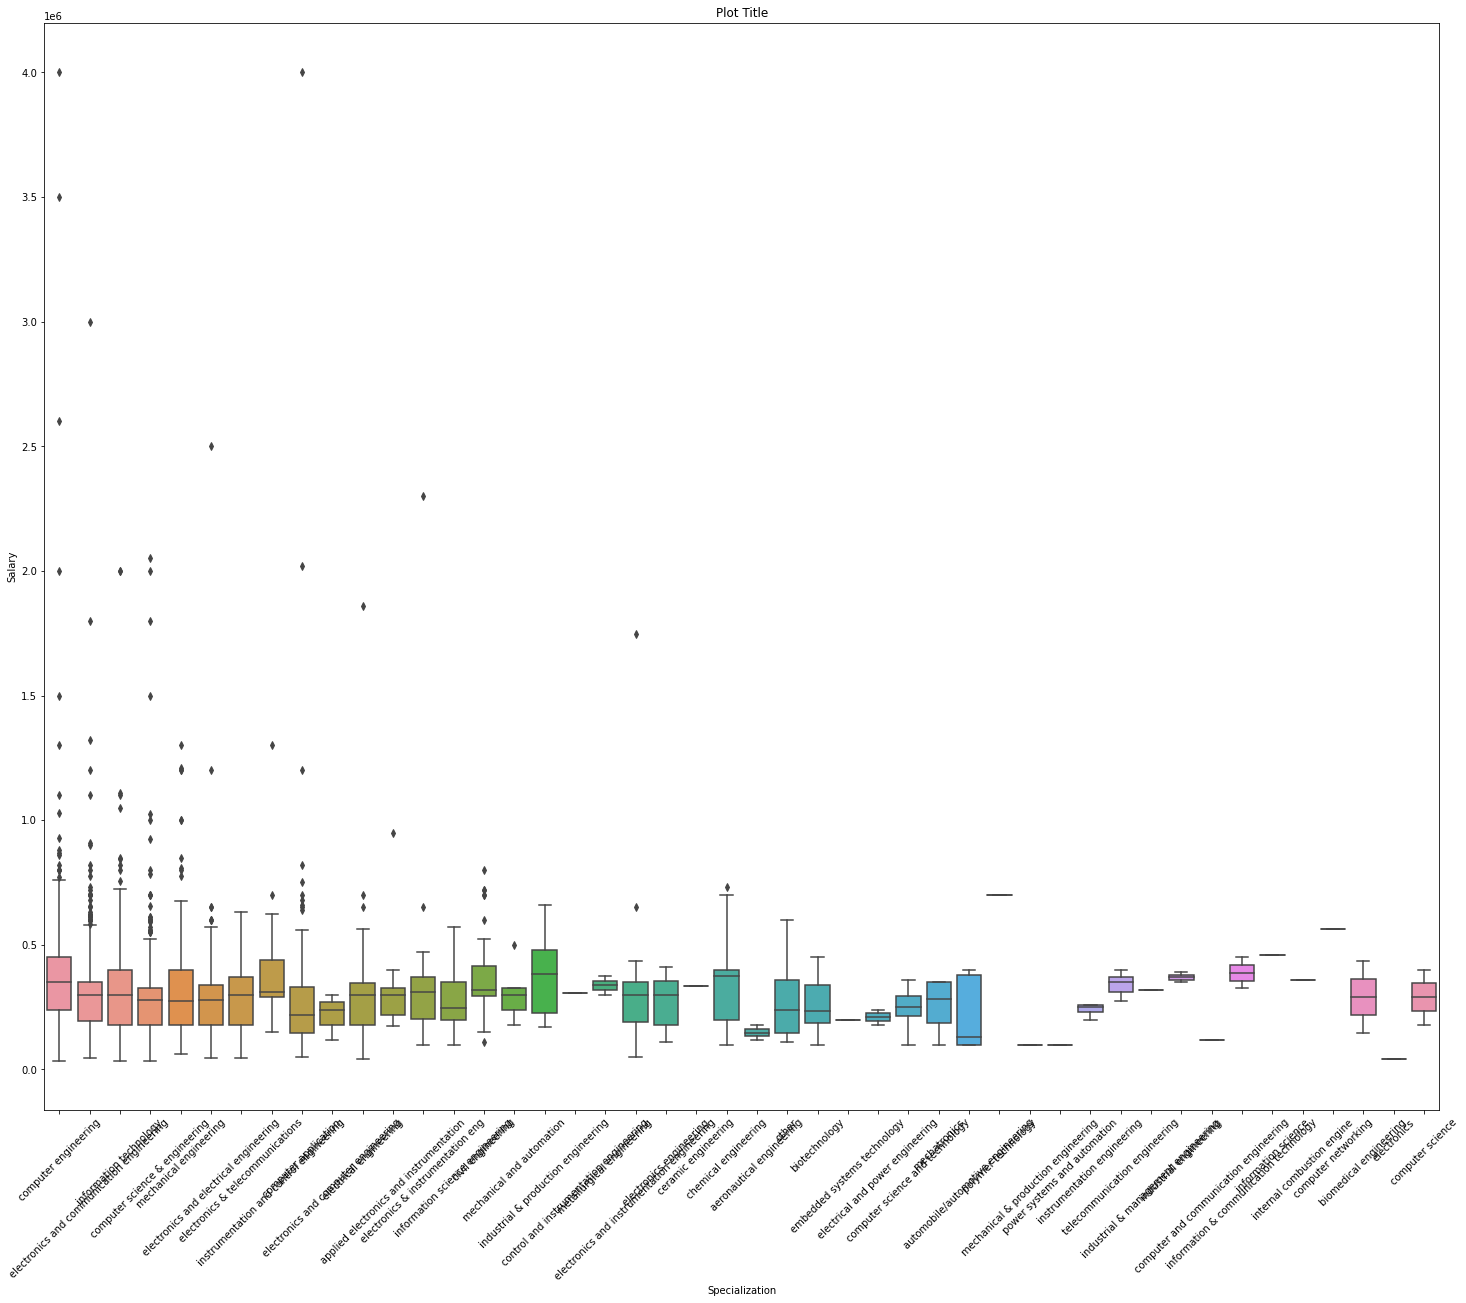

In [239]:
import seaborn as sns
plt.figure(figsize=(25,20))
sns.boxplot(data=df, x='Specialization', y='Salary')
plt.title('Salary by Specialization (Box Plot)')
plt.xlabel('Specialization')
plt.ylabel('Salary')
plt.title('Plot Title')
plt.xticks(rotation=45)  
plt.show()

### Salary vs CollegeState

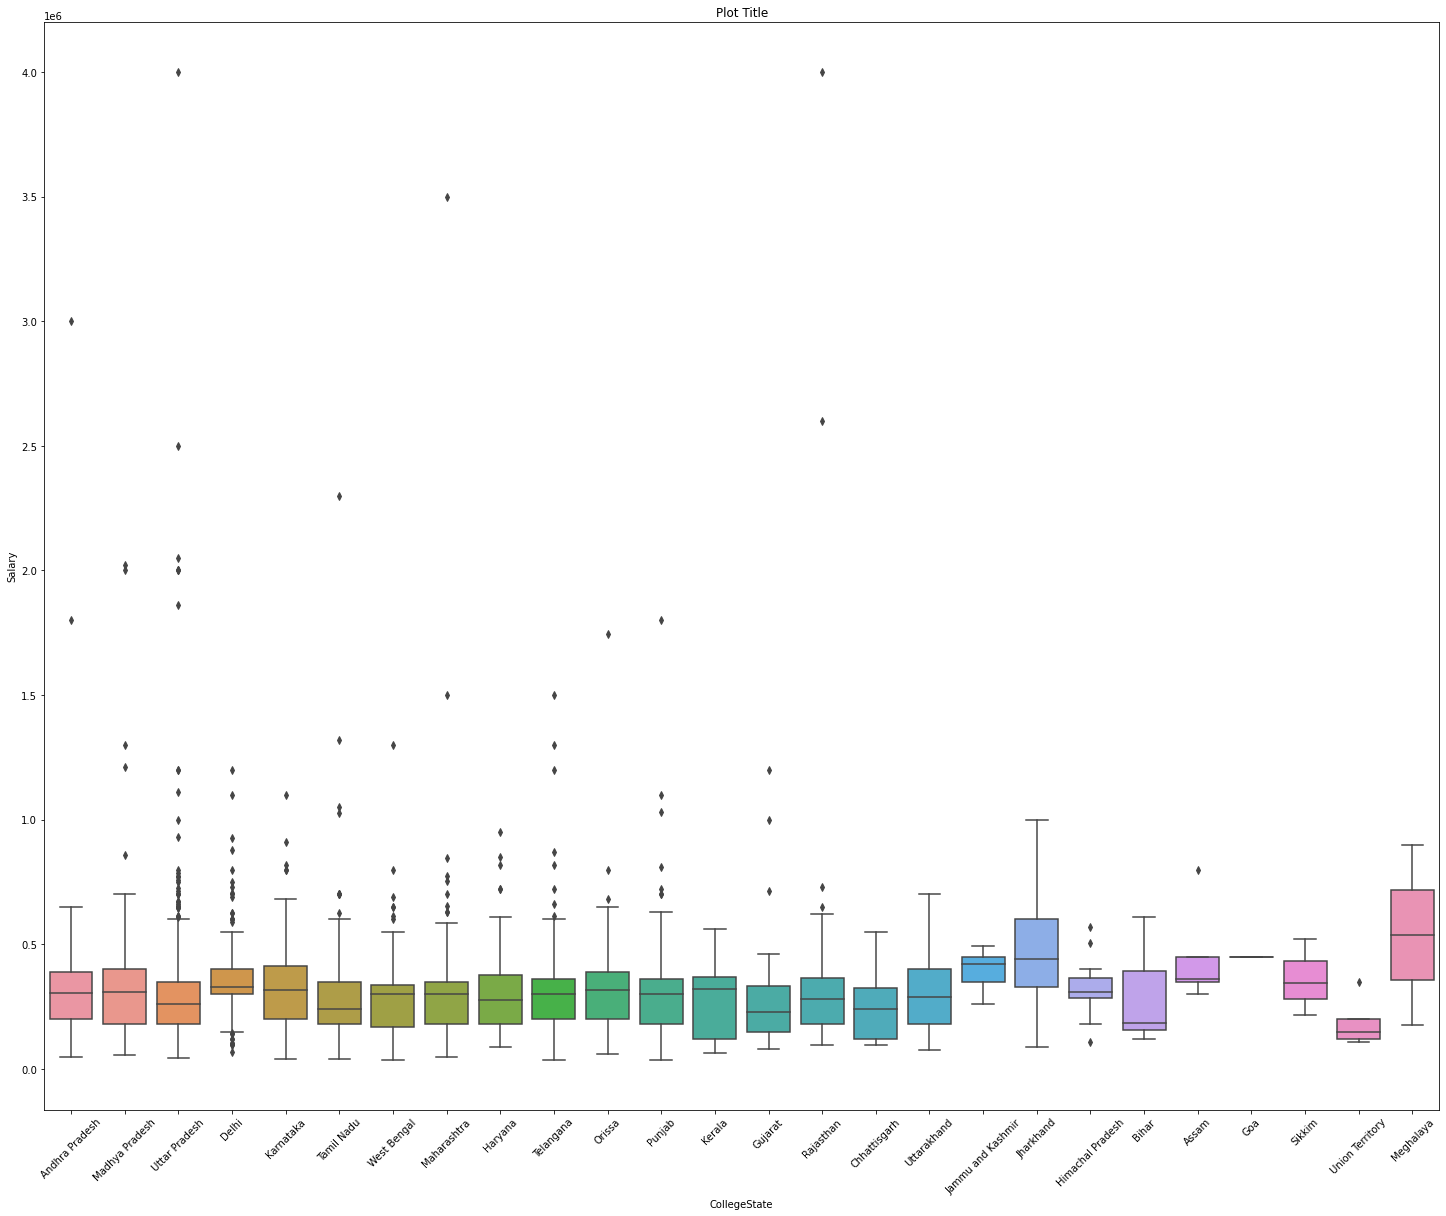

In [240]:
import seaborn as sns
plt.figure(figsize=(25,20))
sns.boxplot(data=df, x='CollegeState', y='Salary')
plt.title('Salary by CollegeState (Box Plot)')
plt.title('Plot Title')
plt.xticks(rotation=45)  
plt.show()

### Bivariate Analysis - Categorical vs Categorical - Vizualization  Analysis.

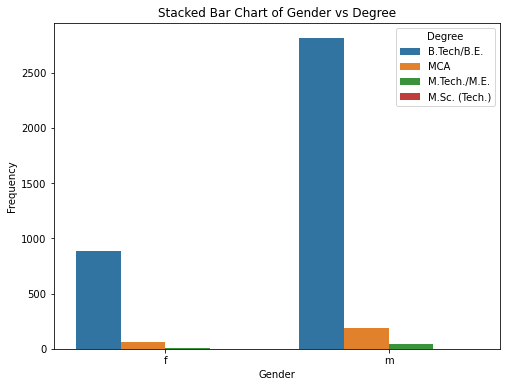

In [196]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Degree')
plt.title('Stacked Bar Chart of Gender vs Degree')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.legend(title='Degree')
plt.show()

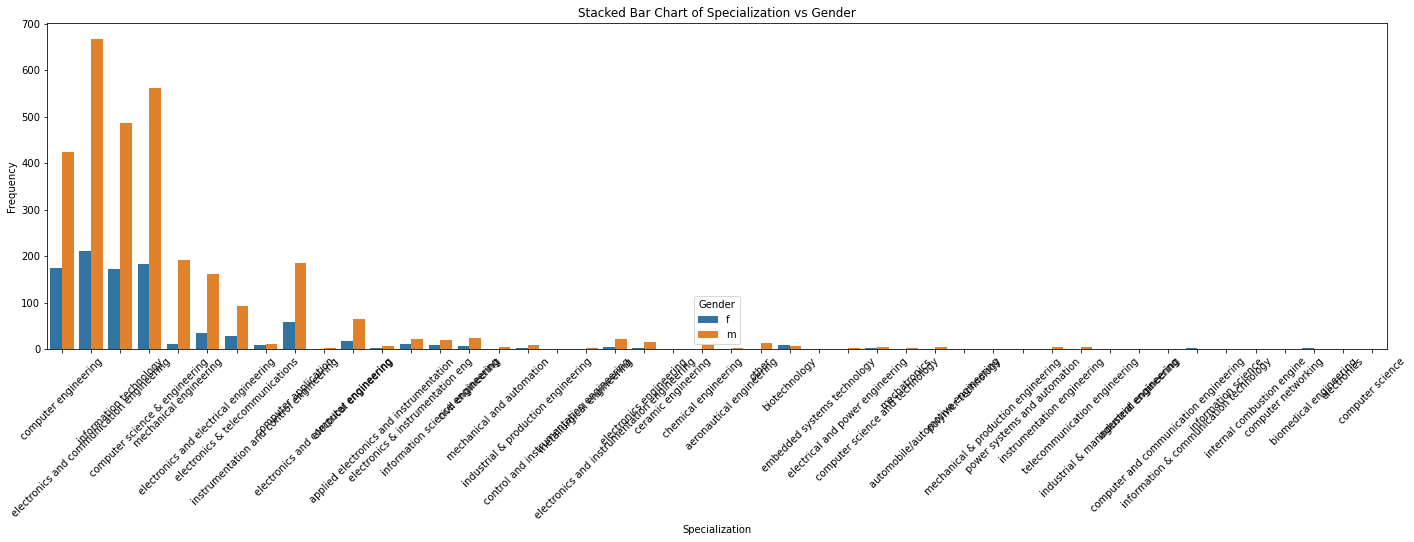

In [204]:
plt.figure(figsize=(24, 6))
sns.countplot(data=df, x='Specialization', hue='Gender')
plt.title('Stacked Bar Chart of Specialization vs Gender')
plt.xlabel('Specialization')
plt.ylabel('Frequency')
plt.legend(title='Gender')
plt.xticks(rotation=45)  
plt.show()

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

Task
Times of India article dated Jan 18, 2019 states that  ###  “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.
Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)


In [199]:
import pandas as pd
# Method 1: Using pd.concat()
merged_df = pd.concat([df['Designation'],df['Salary']], axis=1)
# Method 2: Creating a new DataFrame
merged_df = pd.DataFrame({'Designation':df['Designation'],'Salary': df['Salary']})
# Output the merged DataFrame
print(merged_df)


                      Designation     Salary
0         senior quality engineer   420000.0
1               assistant manager   500000.0
2                systems engineer   325000.0
3        senior software engineer  1100000.0
4                             get   200000.0
...                           ...        ...
3993            software engineer   280000.0
3994             technical writer   100000.0
3995  associate software engineer   320000.0
3996           software developer   200000.0
3997      senior systems engineer   400000.0

[3998 rows x 2 columns]


In [209]:
designation =z['Designation'].value_counts().sort_values(ascending=False).nlargest(5)

In [212]:
designation

software engineer     537
software developer    265
system engineer       205
programmer analyst    139
systems engineer      116
Name: Designation, dtype: int64

In [221]:
salary_ranges = {
    "Programming Analyst": (250000, 300000),
    "Software Engineer": (250000, 300000),
    "Hardware Engineer": (250000, 300000),
    "Associate Engineer": (250000, 300000)}
def calculate_average_salary(salary_ranges):
    total_salary = 0
    count = 0
    for role, salary_range in salary_ranges.items():
        min_salary, max_salary = salary_range
        average_salary = (min_salary + max_salary) / 2
        total_salary += average_salary
        count += 1
    overall_average_salary = total_salary / count
    return overall_average_salary
average_salary = calculate_average_salary(salary_ranges)
print("Average Salary for Computer Science Engineering graduates:", average_salary)
claim = "After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate."
lower_bound_claim = 250000
upper_bound_claim = 300000

if lower_bound_claim <= average_salary <= upper_bound_claim:
    print("The claim is supported by the data.")
else:
    print("The claim is not supported by the data.")


Average Salary for Computer Science Engineering graduates: 275000.0
The claim is supported by the data.


### Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)


In [227]:
df1=df['Specialization']
df2=df['Gender']

C:\Users\deshp\AppData\Local\Temp\ipykernel_27424\4294679928.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


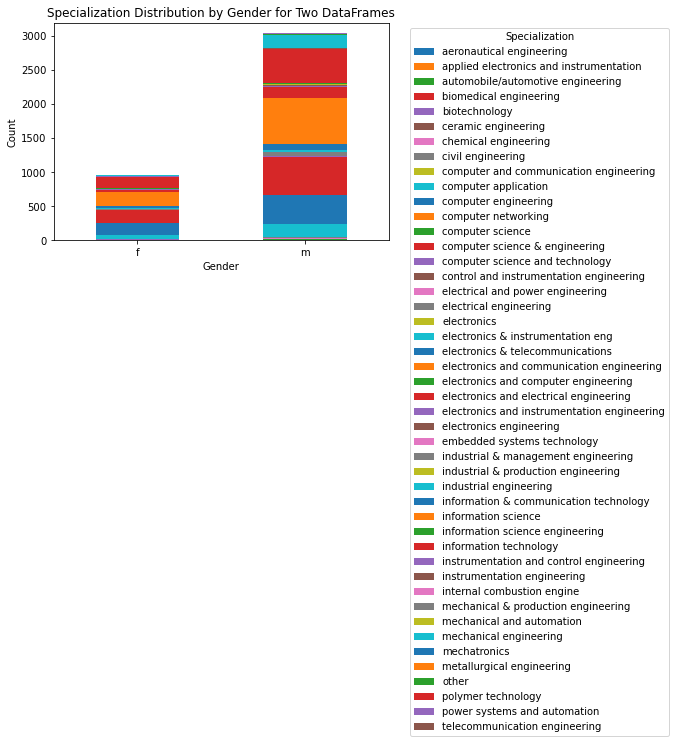

In [238]:
merged_df = merged_df = pd.concat([df1, df2], axis=1)
grouped = merged_df.groupby([df['Gender'], df['Specialization']]).size().unstack(fill_value=0)


grouped.plot(kind='bar', stacked=True)
plt.title('Specialization Distribution by Gender for Two DataFrames')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title=['Specialization_df1', 'Specialization_df2'])
plt.legend(title='Specialization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Observation
The specialization  is affected by gender
There is a significant relationship between gender and Specialization

### Conclusion
Concluding an Exploratory Data Analysis (EDA) project involves summarizing key findings, insights, and implications drawn from the analysis.Embarking on a comprehensive exploration of the AMEO dataset, the journey commenced with a meticulous phase of data cleaning,preprocessing, handling missing values.Recognizing the impact of outliers on statistical measures, a dedicated focus was placed on identifying and managing these extreme values.To enhance the precision of the analysis, certain columns underwent type casting. This step involved converting data types to align with their nature, ensuring accurate representation and facilitating more robust statistical computations.

Upon thorough examination of the AMEO dataset,it highlights a predominant representation from tier-2 colleges.It predominantly features males educated under the State Board of Secondary Education, Andhra Pradesh. B.Tech graduates, especially in CSE, are prevalent, and most individuals are from Uttar Pradesh. Bengaluru emerges as the primary job city, and 'Software Engineer' is the top designation. Notably, Tier 2 college graduates tend to have higher salaries, and male earners consistently earn more. The dataset unveils clear trends in job roles and specializations influencing salary outcomes of AMCAT aspirants.